<a href="https://colab.research.google.com/github/daffaaalf17/Portofolio/blob/main/CAPSTONE2_DAFFA_ALIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang dan Tujuan
Klaim berupa kerugian yang terjadi di AS dapat diajukan kepada TSA (Terminal Security Agency). Terkadang TSA membuat kesalahan, para customer atau penumpang bisa mengalami kerusakan dan kehilangan properti yang mereka miliki di bandara. Maka latar belakang dan tujuan eksporasi data ini adalah untuk 


1.   Eksplorasi data insiden yang diajukan terhadap TSA
2.   Eksplorasi faktor mana yang mengakibatkan jumlah klaim yang dibayarkan lebih tinggi. 

Sehingga kami dapat membantu TSA meningkatkan layanan mereka yang menghasilkan biaya klaim yang lebih rendah.



## Perumusan Masalah
Perusahaan ingin mengetahui


1.   Di bandara mana insiden paling banyak terjadi ?
2.   Di Claim Site manakah insiden paling banyak terjadi ?
3.   Jenis klaim apa saja yang paling banyak diajukan ?
4.   Jenis item apa saja yang paling banyak diajukan ?
5.   Dalam  lima tahun terakhir bagaimana tren jumlah klaim yang diajukan, pada tahun berapakah insiden paling banyak terjadi ?
6.   Bagaimana hasil akhir dari klaim yang diajukan ?
7.   Dalam rentang tahun, berapa jumlah klaim yang disetujui oleh TSA?
8.   Tipe Klaim apa yang memiliki rataan nilai klaim diterima tertinggi ? Dimana insiden tersebut paling sering terjadi?
9.   Claim Site mana yang memiliki rataan nilai klaim diterima tertinggi? Dimana Insiden itu paling sering terjadi?
10. Item apa yang memiliki rataan nilai klaim diterima tertinggi?



# **Data**
Untuk menjawab semua permasalahan diatas, saya akan menganalisa data *TSA Claims* yang sudah dipersiapkan oleh tim. Data dapat diakses [disini](https://drive.google.com/file/d/1QfE6-Y_kUQhr09fp2Vb-oH_7QmmAVpLw/view?usp=share_link)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
pd.set_option('display.max_colwidth', None)

Dataset ini berisi informasi terkait claims yang diajukan kepada TSA dari 2002 sampai 2015. Ada 13 kolom dalam dataset tersebut, yaitu:

* Claim Number   : Merupakan primary key pada dataset ini
* Date Received  : Tanggal diterimanya claim
* Incident Date  : Tanggal terjadinya insiden
* Airport Code   : Kode bandara terjadinya insiden
* Airport Name   : Nama bandara terjadinya insiden
* Airline Name   : Nama maskapai penerbangan terjadinya insiden
* Claim Type     : Jenis klaim
* Claim Site     : Tempat klaim
* Item           : Barang yang di klaim
* Claim Amount   : Nilai klaim yang diajukan
* Status         : Status klaim
* Close Amount   : Nilai klaim yang disetujui
* Dispositition


In [2]:
raw_data = pd.read_csv('tsa_claims.csv')
df = raw_data.copy()
df.head()

<ipython-input-2-bc193b4fbf2d>:1: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset TSA Claims.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (204267, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [4]:
display(df.describe(include='object'))

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


In [5]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

Column Name  Number of Unique  \
0    Claim Number            204258   
1   Date Received              4007   
2   Incident Date             26807   
3    Airport Code               465   
4    Airport Name               485   
5    Airline Name               318   
6      Claim Type                11   
7      Claim Site                 6   
8            Item              4704   
9    Claim Amount             36117   
10         Status                15   
11   Close Amount             17162   
12    Disposition                 3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Secara umum dapat kita ketahui bahwa :
* Dataset ini memiliki 13 kolom dan 204267 baris
* Banyak kolom yang memiliki data kosong yang diwakili dengan data NaN, kolom yang tidak memiliki data kosong antara lain `Claim Number` dan `Date Received`
* Kolom `Claim Amount` dan `Close Amount` seharusnya merupakan data numerik, sisanya merupakan data kategorikal
* Ada beberapa data pada kolum yang ditulis `-`, yang mana seharusnya data tersebut merupakan data kosong. Perlu diubah menjadi `NaN ` agar data kosong menjadi lebih akurat

### Missing Values


In [6]:
# menghapus whitespace pada seluruh kolom kecuali kolom claim number
df.loc[:, df.columns.difference(['Claim Number'])] = df.loc[:, df.columns.difference(['Claim Number'])].apply(lambda x: x.str.strip())


In [7]:
# Mengubah data yang '-' menjadi NaN
df = df.replace('-', np.nan)
# Membuat fungsi untuk menampilkan jumlah missing value dan presentasenya pada setiap kolom
def missing_values(df):
    missing_values = df.isnull().sum().to_frame().reset_index()
    missing_values = missing_values.rename(columns = {'index': 'column', 0: 'number of missing values'})
    missing_values['% missing values'] = (missing_values['number of missing values']/df.shape[0]*100).round(2)
    return missing_values

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,263,0.13
2,Incident Date,2183,1.07
3,Airport Code,8965,4.39
4,Airport Name,8965,4.39
5,Airline Name,38621,18.91
6,Claim Type,8195,4.01
7,Claim Site,1016,0.50
8,Item,8389,4.11
9,Claim Amount,16795,8.22


<Axes: >

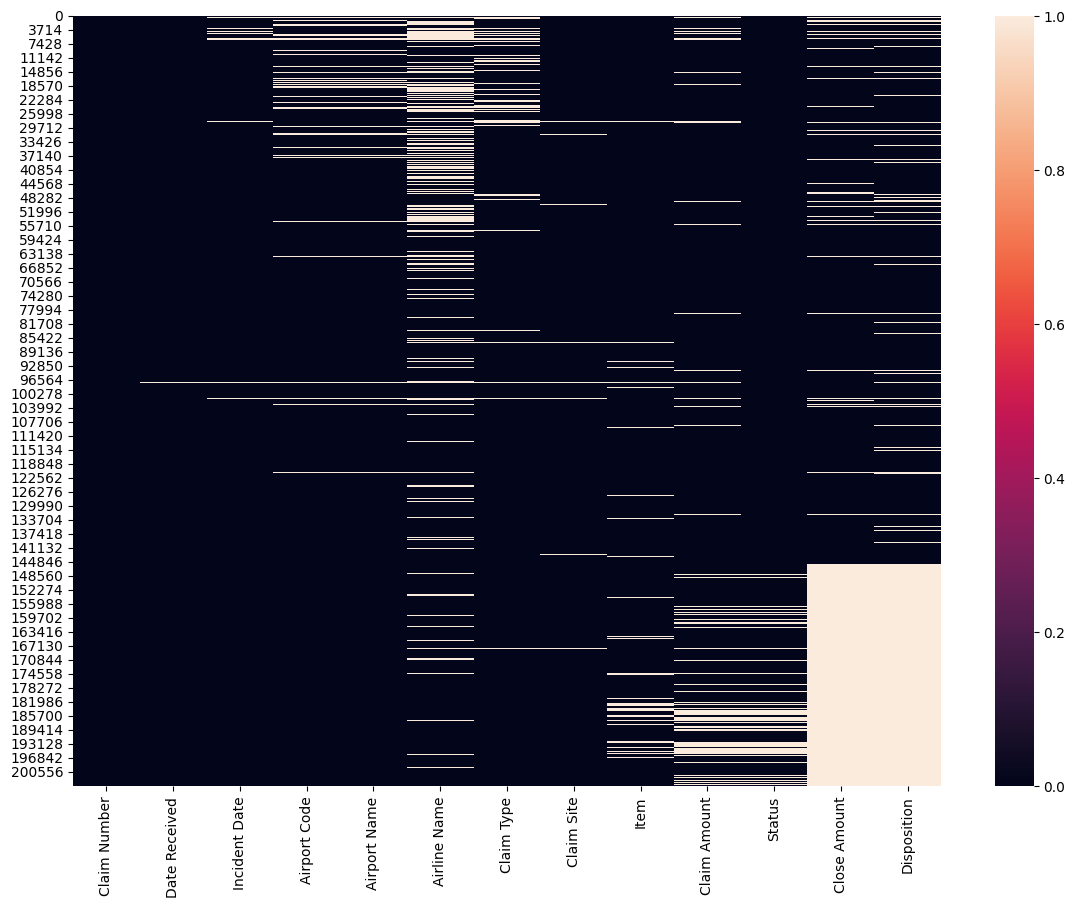

In [8]:
# Sebaran missing values yang ada pada dataset menggunakan heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df[df.columns].isnull())


Untuk mengatasi data kosong ini, pertama-tama saya akan menghapus baris yang memiliki lebih dari 5 data kosong, data ini saya hapus karena informasi yang diberikan terlalu sedikit.

In [9]:
# Menampilkan jumlah baris yang memiliki data kososng lebih dari 5
def missing_values_tresh(df,thresh=0):
  number_of_missing = len(df.columns) - thresh
  missing_values_in_rows = (df.isnull().sum(axis=1) > number_of_missing).value_counts()
  if len(missing_values_in_rows)>1:
        print(f'jumlah baris dengan data kosong \033[1mkurang dari\033[0m  {thresh},  values: {missing_values_in_rows[True]}')
  else:
        print(f'tidak ada data kosong yang kurang dari {thresh} values: 0')

missing_values_tresh(df,5)

jumlah baris dengan data kosong kurang dari  5,  values: 256


In [10]:
# Menghapus baris yang memiliki data kosong lebih dari 5
df = df.dropna(how='any',axis=0,thresh=5)
missing_values_tresh(df,5)

tidak ada data kosong yang kurang dari 5 values: 0


#### Date Received & Incident Date
Pada kolom ini saya memutuskan untuk melakukan penghapusan seluruh baris yang memilik data kosong dikolom ini dikarenakan presenratase yang kecil dan juga sulit untuk mengisinya karena data ini memiliki nilai unique

In [11]:
df = df.drop(df[df['Date Received'].isnull()].index)
df = df.drop(df[df['Incident Date'].isnull()].index)
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,7373,3.65
4,Airport Name,7373,3.65
5,Airline Name,36636,18.15
6,Claim Type,6599,3.27
7,Claim Site,713,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


#### Airport code dan Airport Name
Untuk kedua kolom ini memiliki jumlah missing value yang sama yaitu 7373
Dilakukan pengecekan apakah kedua kolom ini memiliki data kosong dibaris yang sama

In [12]:
len(df[(df['Airport Code'].isnull()) & (df['Airport Name'].isnull())])

7373

Ternyata kedua kolom tersebut memiliki data kosong dibaris yang sama, untuk itu pengangannnya akan dilakukan secara bersamaan. Saya akan mengisikan data kosong ini berdasarkan mode dari pengelompokan claim site atau claim type dengan menganggap mungkin jenis claim tertentu akan lebih sering terjadi dibandara tertentu. Jika dalam baris tersebut tidak ada claim type maupun claim site maka akan diisikan berdasarkan mode dari keseluruhan data


In [13]:
# Membuat fungsi pengisian data kosong berdasarkan metode mean, median, dan mode

def fill_missing_values_by(df_missing, missing_col, group, method):
    
    # df_missing = dataframe yang mengandung indeks yang kosong
    # missing_col = kolom yanh ingin diisikan data kosongnya
    # group = nama kolom yang digunakan untuk mengelompokan data
    # method = metode yang digunakan yaitu ada 3 : mean, median, mode
    
    if method == 'mode':
        grouped_df = df.groupby(group)[missing_col].value_counts()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value].index[0]

    elif method == 'mean':
        grouped_df = df.groupby(group)[missing_col].mean()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value]
    
    elif method == 'median':
        grouped_df = df.groupby(group)[missing_col].median()
        df_missing = df_missing[(df_missing[missing_col].isnull())&(df_missing[group].notnull())]
        
        for i in df_missing.index:
            group_value = df.loc[i, group]
            df.loc[i, missing_col] = grouped_df[group_value]



Saya akan mengisikan data kosong ini berdasarkan mode dari pengelompokan claim site atau claim type dengan menganggap mungkin jenis claim tertentu akan lebih sering terjadi dibandara tertentu. Jika dalam baris tersebut tidak ada claim type maupun claim site maka akan diisikan berdasarkan mode dari keseluruhan data

In [14]:
# mengisi kolom airport code dan airport name berdasarkan mode dari group claim site
fill_missing_values_by(df, 'Airport Code', 'Claim Site', method='mode')
fill_missing_values_by(df, 'Airport Name', 'Claim Site', method='mode')

# mengisi kolom airport code dan airport name berdasarkan mode dari group claim type
fill_missing_values_by(df, 'Airport Code', 'Claim Type', method='mode')
fill_missing_values_by(df, 'Airport Name', 'Claim Type', method='mode')

# mengisi kolom airport code dan airport name berdasarkan mode dari keseluruhan data
df['Airport Code'] = df['Airport Code'].fillna(df['Airport Code'].mode()[0])
df['Airport Name'] = df['Airport Name'].fillna(df['Airport Name'].mode()[0])

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,36636,18.15
6,Claim Type,6599,3.27
7,Claim Site,713,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


#### Airline Name
Missing value pada kolom ini memiliki presentase yang cukup tinggi yaitu 18,5%. Untuk mengisinya saya memilih untuk menggunakan mode yang digroup berdasarkan Airport Code dengan asumsi setiap airport memiliki jumlah airline yang relatif lebih banyak dari airport lain

In [15]:
# menampilkan top 3 airline dengan jumlah penerbangan terbanyak yang dikelompokan berdasarkan airport code
airport_code_group = df.groupby('Airport Code')['Airline Name'].value_counts().groupby(level=0, group_keys=False).head(3).to_frame()
airport_code_group.head(30)

Airline Name
Airport Code Airline Name                      
ABE          USAir                           22
             UAL                             17
             Delta Air Lines                 15
ABI          American Airlines               33
             American Eagle                   3
             Continental Airlines             1
ABQ          Southwest Airlines             316
             American Airlines              122
             Delta Air Lines                 98
ABR          Northwest Airlines              13
             Delta Air Lines                  8
             Frontier Airlines                1
ABY          Delta Air Lines                 24
             American Airlines                1
             Continental Airlines             1
ACK          Cape Air                         8
             Continental Airlines             6
             Jet Blue                         4
ACT          American Airlines               23
             Continental Airlines             3
             American Eagle                   2
ACV          UAL                             27
             Alaska Airlines                  4
             US Express                       3
ACY          Spirit Airlines                108
             AirTran Airlines                 4
             Delta Air Lines                  2
ADK          Alaska Airlines                  1
ADQ          Alaska Airlines                 18
             Aloha Airlines                   1

Ada juga beberapa airport code yang tidak memiliki airline name, untuk kasus ini maka akan diisikan `Not Available`

In [16]:
# Kode untuk menampilkan index `Airport Code` yang tidak memiliki `Airline Name`
no_airline_names = df.groupby('Airport Code')['Airline Name'].count()
no_airline_names[no_airline_names<1].index

Index(['AHN', 'GON', 'GRO', 'HDQ', 'HII', 'HRO', 'MWH', 'PMD', 'RME', 'VEL'], dtype='object', name='Airport Code')

In [17]:
# Mengisi kolom index `Airline Name`dengan `Airport Code` tersebut dengan `Not Available
exception_airport_code = df[df['Airport Code'].isin(['AHN', 'GON', 'GRO', 'HDQ', 'HII', 'HRO', 'MWH', 'PMD', 'RME', 'VEL'])]
df.loc[exception_airport_code.index, 'Airline Name'] = 'Not Available'
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,36601,18.13
6,Claim Type,6599,3.27
7,Claim Site,713,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


In [18]:
# mengisi missing values airline name dengan menggunakan mode berdasarkan pengelompokan airport code

fill_missing_values_by(df, 'Airline Name', 'Airport Code', method = 'mode')
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,6599,3.27
7,Claim Site,713,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


#### Claim Type dan Claim Site
Untuk kolom ini saya akan mengisikan berdasarkan most frequent values, banyak airport yang memiliki `Claim Type` dan `Claim Site` nya berupa Passenger Property Loss' and 'Checked Baggage'. Namun untuk kasus spesial `Airport Code` ZZX dan ZZZ kebanyakan nilai mode yang berbeda, sehingga ada pengecualian


In [19]:
#Pengecualian airport code ZZZ dan ZZX bisa diliat pada syntax berikut
df.groupby('Airport Code')[['Claim Type', 'Claim Site']].agg(pd.Series.mode).reset_index().tail(30)


,Airport Code,Claim Type,Claim Site
434,TRI,Passenger Property Loss,Checked Baggage
435,TSA,Property Damage,Checked Baggage
436,TTN,Passenger Property Loss,Checked Baggage
437,TUL,Passenger Property Loss,Checked Baggage
438,TUP,Passenger Property Loss,Checked Baggage
439,TUS,Passenger Property Loss,Checked Baggage
440,TVC,Passenger Property Loss,Checked Baggage
441,TVF,Property Damage,Checked Baggage
442,TWF,"[Passenger Property Loss, Property Damage]",Checked Baggage
443,TXK,Passenger Property Loss,Checked Baggage


In [20]:
df.loc[df['Airport Code'].isin(['ZZZ', 'ZZX']), ['Airport Code', 'Claim Type', 'Claim Site']]

,Airport Code,Claim Type,Claim Site
17,ZZX,Personal Injury,Motor Vehicle
3257,ZZX,Property Damage,Motor Vehicle
9257,ZZX,Property Damage,Motor Vehicle
31812,ZZX,Property Damage,Motor Vehicle
35089,ZZX,Property Damage,Motor Vehicle
...,...,...,...
204208,ZZZ,Personal Injury,Other
204209,ZZZ,Personal Injury,Motor Vehicle
204240,ZZX,Motor Vehicle,Motor Vehicle
204242,ZZX,Motor Vehicle,Motor Vehicle


In [21]:
df['Claim Type'].value_counts()


Passenger Property Loss    117441
Property Damage             74972
Personal Injury              1462
Employee Loss (MPCECA)        485
Passenger Theft               464
Motor Vehicle                 369
Complaint                      47
Wrongful Death                  4
Compliment                      3
Bus Terminal                    1
Name: Claim Type, dtype: int64

In [22]:
df['Claim Site'].value_counts()

Checked Baggage    159035
Checkpoint          39927
Other                1682
Motor Vehicle         474
Bus Station            16
Name: Claim Site, dtype: int64

Pertama akan saya isikan data kosong untuk airport code pengecualian yaitu ZZX dan ZZZ


In [23]:
airport_code_exception = df[df['Airport Code'].isin(['ZZX','ZZZ'])]

fill_missing_values_by(airport_code_exception, 'Claim Type', 'Airport Code', method = 'mode')
fill_missing_values_by(airport_code_exception, 'Claim Site', 'Airport Code', method = 'mode')

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,6594,3.27
7,Claim Site,709,0.35
8,Item,8090,4.01
9,Claim Amount,15204,7.53


In [24]:
# mengisikan data kosong pada claim type dan claim site berdasarkan mode data keseluruhan
df['Claim Type'] = df['Claim Type'].fillna(df['Claim Type'].mode()[0])
df['Claim Site'] = df['Claim Site'].fillna(df['Claim Site'].mode()[0])

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,8090,4.01
9,Claim Amount,15204,7.53


#### Item
Untuk kolom item saya akan menngisikannya dengan data yang paling banyak keluar yaitu `Other`.

In [25]:
df['Item'].value_counts().head()

Other                                         36365
Luggage (all types including footlockers)     18619
Clothing - Shoes; belts; accessories; etc.    14665
Jewelry - Fine                                 9778
Locks                                          9427
Name: Item, dtype: int64

In [26]:
# mengisi data pasang pada kolom item dengan mode pada data kolom tersebut
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,15204,7.53


#### Claim Amount
Untuk kolom ini pertama-tama akan saya hapuskan karakter '$' dan ';' dan mengubah formatnya menjadi float

In [27]:
# membuat fungsi menghapus list atau string dan merubah format data
def remove_and_format(df, col, remove, dtype='str'):
    if type(remove) == list:
        
        if type(col) == list:
            for i in col:
                for j in remove:
                    df[i] = df[i].str.replace(j,'', regex=False)
                df[i] = df[i].astype(dtype)

        elif type(col) == str:
            for j in remove:
                df[col] = df[col].str.replace(j,'', regex=False)
            df[col] = df[col].astype(dtype)

    elif type(remove) == str:
        
        if type(col) == list:
            for i in col:
                df[i] = df[i].str.replace(remove,'', regex=False)
                df[i] = df[i].astype(dtype)    

        elif type(col) == str:
            df[col] = df[col].str.replace(remove,'', regex=False)
            df[col] = df[col].astype(dtype)    
            
# Menghapus karakter '$' dan ';', dan merubah menjadi format data menjadi float 
remove_and_format(df, 'Claim Amount', ['$', ';'], 'float64')
df.groupby('Claim Type')['Claim Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Bus Terminal,1.0,1.400000e+02,NaN,140.0,140.0000,140.00,140.0000,1.400000e+02
Complaint,14.0,2.488214e+01,5.013185e+01,0.0,0.0000,0.00,34.4500,1.850000e+02
Compliment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employee Loss (MPCECA),469.0,5.784312e+02,2.163037e+03,0.0,39.6600,131.29,405.0000,3.511060e+04
Motor Vehicle,282.0,1.680808e+03,1.803188e+03,0.0,536.4425,1140.89,2142.7875,1.167223e+04
Passenger Property Loss,114345.0,2.275919e+04,7.393359e+06,0.0,20.3300,125.00,411.8600,2.500000e+09
Passenger Theft,462.0,7.311362e+02,2.547423e+03,0.0,68.4350,178.50,499.9875,2.750000e+04
Personal Injury,1031.0,2.920943e+09,9.343112e+10,0.0,172.5000,2500.00,32533.0500,3.000000e+12
Property Damage,70036.0,3.460577e+02,1.033266e+04,0.0,35.4875,100.00,250.0000,1.900010e+06


Dari data statistik diatas dapat dilihat bahwa nilai pengajuan klaim untuk setiap `Claim Type` memiliki nilai median yang berbeda cukup jauh, untuk itu saya akan memasukan nilai claim amount berdasarkan median dari pengelompokan claim type. Kemudian untuk nilai compliment akan diisikan 0 seluruhnya.

In [28]:
fill_missing_values_by(df, 'Claim Amount', 'Claim Type', method='median')
df['Claim Amount'] = df['Claim Amount'].fillna(0)

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


#### Status
Untuk data kosong pada kolom status akan diisikan `Not Available`

In [29]:
df['Status'] = df['Status'].fillna('Not Available')

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


Kemudian saya akan melakukan beberapa pembersihan data 

In [30]:
df['Status'].value_counts()

Denied                                                                                                                           67977
Approved                                                                                                                         34729
Deny                                                                                                                             28237
Settled                                                                                                                          27714
Not Available                                                                                                                    12668
Approve in Full                                                                                                                  12364
Canceled                                                                                                                          6408
Settle                                                 

Beberapa data yang memiliki arti sama tetapi string ya berbeda akan diganti, seperti `Denied` `Deny`,  `Approved in Full` `Approved` `Settled` `Settle`.

In [31]:
df['Status'] = df['Status'].str.replace('Denied', 'Deny', regex=False)
df['Status'] = df['Status'].str.replace('Approved', 'Approve in Full', regex=False)
df['Status'] = df['Status'].str.replace('Settled', 'Settle', regex=False)

df['Status'].value_counts()

Deny                                                                                                                             96214
Approve in Full                                                                                                                  47093
Settle                                                                                                                           33480
Not Available                                                                                                                    12668
Canceled                                                                                                                          6408
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     4564
Closed as a contractor claim                                                                                                      1302
In litigation                                          

#### Close Amount
Pada kolom ini akan ada beberapa asumsi pola:
* Jika `Status` atau `Disposisition` nya `Approved in Full` maka `Claim Amount`=`Close Amount`
* Jika `Status` nya `Deny` atau`Canceled` maka `Close Amount`= 0



In [32]:
# mengecek apakah claim amount = close amount pada approved claims
df_approved = raw_data[(raw_data['Disposition'] == 'Approve in Full')|(raw_data['Status'].isin(['Approve in Full', 'Approved']))].copy()

# mengecek jumlah baris claim amount = close amount
# True : claim amount = close amount
# False : claim amount != close amount
print((df_approved['Claim Amount'] == df_approved['Close Amount']).value_counts())
df_approved.head()

True     33737
False    13637
dtype: int64


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
6,2007050124750,30-Apr-02,4/26/2007 0:00,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,$106.52,Approved,$106.52,Approve in Full
7,12772,20-Jun-02,5/9/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full


<Axes: xlabel='Claim Amount', ylabel='Close Amount'>

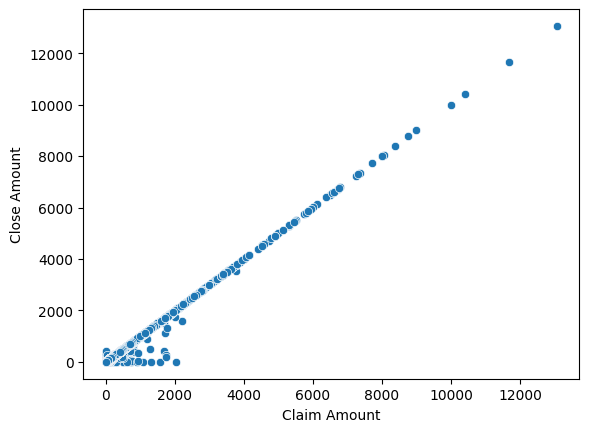

In [33]:
# membuat lineplot dengan x dan y adalah claim amount dan close amount pada approved claims
remove_and_format(df_approved, ['Claim Amount', 'Close Amount'], ['$', ';'], 'float64')
sns.scatterplot(data = df_approved, x='Claim Amount', y='Close Amount')

Terlihat bahwa nilai claim amount sama dengan close amount untuk status approved, namun memang ada beberapa noise data diawal yang bisa diabaikan

In [34]:
# mengecek apakah nilai close amount = 0 untuk claim yang deny
df_deny_canceled = raw_data[raw_data['Status'].isin(['Deny','Denied', 'Canceled'])].copy()
remove_and_format(df_deny_canceled, ['Claim Amount', 'Close Amount'], ['$', ';'], 'float64')

# mengecek jumlah baris nilai close amount = 0 untuk claim yang deny
# True : close amount = 0
# False : close amount != 0
df_deny_canceled = df_deny_canceled.dropna(subset='Close Amount')
print((df_deny_canceled['Close Amount']==0).value_counts())

df_deny_canceled.head()

True     70204
False     1013
Name: Close Amount, dtype: int64


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
15,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.0,Denied,0.0,Deny
16,15324,12-Jul-02,6/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Other,Luggage (all types including footlockers),50.0,Denied,0.0,Deny
17,15361,15-Jul-02,3/11/2002 0:00,NaN,NaN,NaN,Personal Injury,Motor Vehicle,Luggage (all types including footlockers),110000.0,Denied,0.0,Deny
19,0714534M,22-Jul-02,3/6/2002 0:00,NaN,NaN,Northwest Airlines,Property Damage,Other,Photographic Film,68.0,Denied,0.0,Deny
22,0616723L,5-Aug-02,NaN,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,0.0,Deny


Data diatas meyakinkan saya untuk mengisi close amount = claim amount untuk status approved dan mengisi close amount = 0 untuk data close amount yang statusnya deny

In [35]:
# mengubah format close amount dari object menjadi float
remove_and_format(df, 'Close Amount', ['$', ';'], 'float64')

df.groupby('Claim Type')['Close Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Bus Terminal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compliment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employee Loss (MPCECA),434.0,106.916198,236.326607,0.0,0.0,23.500,114.3750,2929.51
Motor Vehicle,154.0,1171.238312,1689.686994,0.0,0.0,733.625,1424.4750,11672.23
Passenger Property Loss,83132.0,87.990502,974.812495,0.0,0.0,0.000,60.6075,250000.00
Passenger Theft,443.0,142.112867,551.354302,0.0,0.0,29.500,100.0000,9999.99
Personal Injury,729.0,1023.877229,6522.799860,0.0,0.0,0.000,25.7300,125000.00
Property Damage,49314.0,98.369731,303.841341,0.0,0.0,20.505,79.5000,15000.00


In [36]:
# filter data yang memiliki status atau disposisition nya approved, kemudian difilter kembali yang memiliki close amount sama dengan null
df_approved = df[(df['Disposition'] == 'Approve in Full')|(df['Status'] == 'Approve in Full')]
df_approved = df_approved[df_approved['Close Amount'].isnull()]

# mengisi kolom close amounnt tadi dengan nilai close amount
df.loc[df_approved.index, 'Close Amount'] = df.loc[df_approved.index, 'Claim Amount'] 
missing_values(df)


,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


In [37]:
# mengisi data kosong lainnya dengan nilai 0
df['Close Amount'] = df['Close Amount'].fillna(0)

missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.00
1,Date Received,0,0.00
2,Incident Date,0,0.00
3,Airport Code,0,0.00
4,Airport Name,0,0.00
5,Airline Name,0,0.00
6,Claim Type,0,0.00
7,Claim Site,0,0.00
8,Item,0,0.00
9,Claim Amount,0,0.00


#### Disposistion
Untuk kolom ini akan diisikan sama dengan statusnya  yaitu antara lain approved in full, deny, atau settle

In [38]:
df['Disposition'].value_counts()

Deny               68019
Approve in Full    34739
Settle             27723
Name: Disposition, dtype: int64

Jika tidak diantara ketiga itu maka akan diisikan Not Available

In [39]:
list_status = ['Approve in Full', 'Deny', 'Settle']

missing_disposition = df[(df['Disposition'].isnull()) & (df['Status'].isin(list_status))]

df.loc[missing_disposition.index, 'Disposition'] = df.loc[missing_disposition.index, 'Status']

df['Disposition'] = df['Disposition'].fillna('Not Available')



missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.0
1,Date Received,0,0.0
2,Incident Date,0,0.0
3,Airport Code,0,0.0
4,Airport Name,0,0.0
5,Airline Name,0,0.0
6,Claim Type,0,0.0
7,Claim Site,0,0.0
8,Item,0,0.0
9,Claim Amount,0,0.0


### Data Formatting


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201847 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Claim Number   201847 non-null  object 
 1   Date Received  201847 non-null  object 
 2   Incident Date  201847 non-null  object 
 3   Airport Code   201847 non-null  object 
 4   Airport Name   201847 non-null  object 
 5   Airline Name   201847 non-null  object 
 6   Claim Type     201847 non-null  object 
 7   Claim Site     201847 non-null  object 
 8   Item           201847 non-null  object 
 9   Claim Amount   201847 non-null  float64
 10  Status         201847 non-null  object 
 11  Close Amount   201847 non-null  float64
 12  Disposition    201847 non-null  object 
dtypes: float64(2), object(11)
memory usage: 25.6+ MB


Pada sub ini saya akan mengubah format tanggal data dari `Date Received` dan  `Incident Date`

In [41]:
# Membuat fungsi untuk merubah bentuk format DD/MM/YYYY 0:00 menjadi DD-Month-YY
def date_format(x):
    date_list = x.split('/')
    month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    day = date_list[1] 
    month = month_list[int(date_list[0])-1]
    year = date_list[2][2:4]
    
    new_format = f'{day}-{month}-{year}'

    return new_format     

Disini ada dua tipe kesalahan data, pertama adalah yang berformat MM/DD/YYYY dan yang kedua adalah yang berformat DD-Mon-YY H

In [42]:
wrong_date_format_1 = df[df['Incident Date'].str.contains('/')]
wrong_date_format_1.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approve in Full,350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settle,227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approve in Full,84.79,Approve in Full


In [43]:
wrong_date_format_2 = df[df['Incident Date'].str.contains('\d+-\w+-\d+\s\d', regex=True)]
wrong_date_format_2

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
28862,0226594M,26-Feb-04,03-SEP-0300 00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),150.00,Canceled,0.00,Not Available
51558,2005012474094,7-Dec-04,10-OCT-0200 00:00,CLE,Cleveland Hopkins International,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,52.92,Settle,26.46,Settle
52196,2005010673015,14-Dec-04,05-DEC-0204 00:00,FLL,Ft. Lauderdale-Hollywood International,Jet Blue,Passenger Property Loss,Checked Baggage,Other,400.00,Settle,200.00,Settle
52637,2005011073340,21-Dec-04,20-MAR-0201 00:00,SFO,San Francisco International,USAir,Property Damage,Checked Baggage,Luggage (all types including footlockers),200.00,Canceled,0.00,Not Available
52918,2005011273547,27-Dec-04,25-SEP-0204 00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Computer - Laptop,399.00,Closed as a contractor claim,0.00,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138597,2009062560620,19-Jun-09,15-JUN-0209 00:00,DEN,Denver International Airport,UAL,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,150.00,Deny,0.00,Deny
138786,2009062660665,25-Jun-09,19-JUN-0209 00:00,MDW,Midway International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,251.75,Deny,0.00,Deny
139491,2009072161530,14-Jul-09,26-MAY-0201 00:00,GSP,Greenville-Spartanburg,USAir,Property Damage,Checked Baggage,Ceramics - Animals; etc.,20.00,Deny,0.00,Deny
139731,2009072861869,20-Jul-09,03-MAY-1008 00:00,PHX,Phoenix Sky Harbor International,Alaska Airlines,Property Damage,Checked Baggage,Locks,20.00,Deny,0.00,Deny


Yang pertama masih akan saya betulkan, dan yang kedua akan saya drop karena tahunnya sulit diinterpretasikan dan jumlahnya yang sedikit hanya 164

In [44]:
# drop kesalahan jenis penulisan tanggal ke dua
df = df.drop(wrong_date_format_2.index)
# mengubah kesalahan format penulisan ke satu dengan fungsi yang sudah dibuat sebelumnya date_format
df.loc[wrong_date_format_1.index, 'Incident Date'] = df.loc[wrong_date_format_1.index, 'Incident Date'].apply(date_format)

df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12-Dec-02,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approve in Full,350.00,Approve in Full
1,0202417M,2-Feb-02,16-Jan-04,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,Settle
2,0202445M,4-Feb-02,26-Nov-03,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settle,227.92,Settle
3,0909816M,7-Feb-02,6-Jan-03,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,Approve in Full
4,2005032379513,18-Feb-02,5-Feb-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approve in Full,84.79,Approve in Full


Ada data yang memiliki  typo pada penulisan tanggal , hal ini diketahui karena terjadi gagal dalam pengubahan format date time, yaitu pada tanggal 30 juni

In [45]:
typo_date = df[df['Incident Date'].str.contains('30-Jun-$', regex=True)]
typo_date

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
151914,2010082375250,19-Aug-10,30-Jun-,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Motor Vehicle,Motor Vehicle,Other,829.93,Approve in Full,829.93,Approve in Full


In [46]:
# Melihat data aktual pada data raw
raw_data.loc[typo_date.index] 

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
151914,2010082375250,19-Aug-10,6/30/10,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,-,-,$829.93,Approve in Full,NaN,NaN


In [47]:
# merubah typo
df.loc[typo_date.index, 'Incident Date'] = '30-Jun-10' # fixing the typo

In [48]:
# Melakukan formatting data object menjadi datatime
df['Date Received'] = pd.to_datetime(df['Date Received'])
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201683 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   201683 non-null  object        
 1   Date Received  201683 non-null  datetime64[ns]
 2   Incident Date  201683 non-null  datetime64[ns]
 3   Airport Code   201683 non-null  object        
 4   Airport Name   201683 non-null  object        
 5   Airline Name   201683 non-null  object        
 6   Claim Type     201683 non-null  object        
 7   Claim Site     201683 non-null  object        
 8   Item           201683 non-null  object        
 9   Claim Amount   201683 non-null  float64       
 10  Status         201683 non-null  object        
 11  Close Amount   201683 non-null  float64       
 12  Disposition    201683 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 25.6+ MB


Kemudian ada beberapa data janggal dimana `Data Received` melewati `Incident Date`. Karena hal ini tidak memungkinkan maka akan saya drop

In [49]:
odd_dates = df[df['Date Received'] < df['Incident Date']]
odd_dates

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approve in Full,350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settle,50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settle,227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approve in Full,50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approve in Full,84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160944,2011061784423,2011-06-08,2011-06-17,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Property Damage,Motor Vehicle,Other,100.00,Not Available,0.00,Not Available
161027,2011062284549,2011-06-10,2011-06-22,SAN,San Diego International,American Airlines,Passenger Property Loss,Checked Baggage,Medical/Science,125.00,Not Available,0.00,Not Available
161035,2011062384567,2011-06-10,2011-06-23,PHF,Newport News / Williamsburg International,Delta Air Lines,Property Damage,Checked Baggage,Clothing,100.00,Not Available,0.00,Not Available
161154,2011070184895,2011-06-14,2011-07-01,LAX,Los Angeles International Airport,American Airlines,Property Damage,Checkpoint,Clothing,100.00,Not Available,0.00,Not Available


In [50]:
df = df.drop(odd_dates.index)

### Dupicates

In [51]:
# cek duplikat dikeseulurah dataframe
df.duplicated().sum()

1

In [52]:
df[df.duplicated(keep=False)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16841,2004050450432,2003-09-26,2003-09-13,LAX,Los Angeles International Airport,American Airlines,Property Damage,Checked Baggage,DVD/CD Players,31.96,Canceled,0.0,Not Available
16842,2004050450432,2003-09-26,2003-09-13,LAX,Los Angeles International Airport,American Airlines,Property Damage,Checked Baggage,DVD/CD Players,31.96,Canceled,0.0,Not Available


In [53]:
# drop salah satu data duplikat
df = df.drop_duplicates()
df.duplicated().sum()

0

#### Claim Number

In [54]:
# cek duplikat di claim number
df['Claim Number'].duplicated().sum()


8

In [55]:
duplicate_claim_number = df[df['Claim Number'].duplicated(keep=False)]
duplicate_claim_number.sort_values('Claim Number')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
180323,2013050203487,2013-05-01,2013-01-21,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,Other,2500.00,Not Available,0.0,Not Available
196321,2013050203487,2015-02-27,2013-01-21,BOS,Boston (Logan) International Airport,American Airlines,Personal Injury,Checkpoint,Other,0.00,Deny,0.0,Deny
180125,2013053003894,2013-04-23,2013-04-22,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Motor Vehicle,Checked Baggage,Baggage/Cases/Purses,1140.89,Not Available,0.0,Not Available
186836,2013053003894,2014-04-18,2013-04-22,ACY,Atlantic City International,Spirit Airlines,Motor Vehicle,Motor Vehicle,Baggage/Cases/Purses,2233.86,Settle,0.0,Settle
183088,2013081205863,2013-08-07,2013-08-02,ZZZ,Unspecified Personal Injury,Delta Air Lines,Personal Injury,Motor Vehicle,Other,2500.00,Not Available,0.0,Not Available
186837,2013081205863,2014-04-24,2013-08-02,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Personal Injury,Motor Vehicle,Other,20000.00,Settle,0.0,Settle
182797,2013081805991,2013-07-30,2012-12-21,HPN,Westchester County; White Plains,USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,2500.00,Not Available,0.0,Not Available
186744,2013081805991,2014-01-13,2012-12-21,HPN,Westchester County; White Plains,USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,0.00,Deny,0.0,Deny
182660,2013082906390,2013-07-23,2013-07-23,BNA,Nashville International,Southwest Airlines,Personal Injury,Checkpoint,Other,2500.00,Not Available,0.0,Not Available
186838,2013082906390,2014-07-03,2013-07-23,BNA,Nashville International,Southwest Airlines,Personal Injury,Checkpoint,Other,2500.00,Not Available,0.0,Not Available


untuk `Claim Number` yang sama kan didrop data lamanya sehingga hanya tersisa data yang terbaru saja

In [56]:
df = df.sort_values('Date Received').drop_duplicates(subset='Claim Number', keep='last')
df['Claim Number'].duplicated().sum()

0

#### Airport Code dan Airport Name



In [57]:
# cek apakah setiap jumlah airport code sama dengan airport name
print('Number of unique of Airport Code=', df['Airport Code'].nunique())
print('Number of unique of Airport Name=', df['Airport Name'].nunique())

Number of unique of Airport Code= 464
Number of unique of Airport Name= 466


In [58]:
# cek airport code yang memiliki lebih dari satu airport name
airport_name_unique = df.groupby('Airport Code')['Airport Name'].nunique()
airport_name_unique[airport_name_unique > 1]

Airport Code
BZN    2
EWR    2
PNS    2
Name: Airport Name, dtype: int64

In [59]:
duplicate_airport_name = df.groupby('Airport Code')['Airport Name'].value_counts()
duplicate_airport_name[['BZN', 'EWR', 'PNS','LAX']]

Airport Code  Airport Name                             
BZN           Gallatin Field                                 194
              Bozeman Yellowstone International Airport        1
EWR           Newark International Airport                  6775
              John F. Kennedy International                    1
PNS           Pensacola Regional                             226
              Pensacola International Airport                 14
LAX           Los Angeles International Airport            16687
Name: Airport Name, dtype: int64

Kemudian akan diubah nama airport sesuai dengan nama airport yang benar yaitu
* BZN = Bozeman Yellowstone International Airport
* EWR = Newark International Airport
* PNS = Pensacola International Airport



In [60]:
df.loc[df['Airport Code'] == 'BZN', 'Airport Name'] = 'Bozeman Yellowstone International Airport'
df.loc[df['Airport Code'] == 'EWR', 'Airport Name'] = 'Newark International Airport'
df.loc[df['Airport Code'] == 'PNS', 'Airport Name'] = 'Pensacola International Airport'

print('Number of unique of Airport Code=', df['Airport Code'].nunique())
print('Number of unique of Airport Name=', df['Airport Name'].nunique())

Number of unique of Airport Code= 464
Number of unique of Airport Name= 464


#### Disposition
Untuk mempermudah analisa data, kolom ini akan dikelompokan menjadi dua berdasarkan adanya string `Approved in Settle` atau `Settle` menjadi `Approved or Settled`, sisanya akan menjadi `Denied or Not Available`

In [61]:
df['Disposition Group'] = np.where(df['Disposition'].isin(['Approve in Full', 'Settle']),
                           'Approved or Settled',
                           'Denied or Not Available')

df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Disposition Group
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approve in Full,75.0,Approve in Full,Approved or Settled
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.0,Not Available,Denied or Not Available
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Deny,0.0,Deny,Denied or Not Available
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approve in Full,17.0,Approve in Full,Approved or Settled
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.0,Not Available,Denied or Not Available


In [62]:
missing_values(df)

,column,number of missing values,% missing values
0,Claim Number,0,0.0
1,Date Received,0,0.0
2,Incident Date,0,0.0
3,Airport Code,0,0.0
4,Airport Name,0,0.0
5,Airline Name,0,0.0
6,Claim Type,0,0.0
7,Claim Site,0,0.0
8,Item,0,0.0
9,Claim Amount,0,0.0


#### Item
Untuk kolom ini sangat banyak variasinya, untuk itu akan saya kategorikan dengan membuat kolom baru

In [63]:
# fungsi untuk memasukan item terhadap item category dengan item dict yang akan disiapkan
def item_group(df, col, col_group, category, list_item):
    df[col_group] = np.where((df[col].str.lower().str.contains('|'.join(list_item))) & (df[col_group] != ''),
                       df[col_group]+ ';' + category,
                       np.where((df[col].str.lower().str.contains('|'.join(list_item))) & (df[col_group] == ''),
                       df[col_group] + category,
                       df[col_group]
                       )
                      )

In [64]:
# Membuat kolom item group
df.insert(10, 'Item Group', value= '')

# persiapan item dict
item_dict = {'Clothing':['clothing','shoes'],
             'Electronic': ['camera', 'computer', 'electronic', 'cell phone', 'video', 'audio', 'mp3',
                            'gps', 'dvd', 'cd', 'hearing aids'],

             'Luggage':['luggage','baggage', 'bag', 'briefcase', 'purse'],
             'Jewelry':['jewelry'],
             'Accessories':['personal accessories','eyeglasses', 'watches'],
             'Lock':['lock'],
             'Cosmetic & Medicine':['cosmetic','medicine', 'medical'],
             'Currency':['currency'],
             'Tool & Equipment':['tool','equipment']
}

# melakukan for loop untuk mengecek setiap nilai item untuk memasukan ke kolom kategori yang sesuai
for category, list_item in item_dict.items():
    item_group(df, 'Item', 'Item Group', category, list_item)

In [65]:
# mengisi sisanya dengan'Other'
df['Item Group'] = df['Item Group'].str.replace('^$', 'Other', regex=True)
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Item Group,Status,Close Amount,Disposition,Disposition Group
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Clothing,Approve in Full,75.00,Approve in Full,Approved or Settled
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,2270.09,Electronic,Canceled,0.00,Not Available,Denied or Not Available
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Jewelry,Deny,0.00,Deny,Denied or Not Available
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.71,Accessories,Approve in Full,17.00,Approve in Full,Approved or Settled
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Clothing,Canceled,0.00,Not Available,Denied or Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96941,2005081190381,2025-08-02,2005-07-02,ORD,Chicago O'Hare International Airport,LOT Polish Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,599.00,Electronic,Deny,0.00,Deny,Denied or Not Available
96940,2005081290465,2025-08-02,2005-07-20,SAN,San Diego International,Jet Blue,Passenger Property Loss,Checked Baggage,Photographic Film,32.14,Other,Canceled,0.00,Not Available,Denied or Not Available
96942,0212087M,2040-02-12,2003-12-20,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Property Damage,Checked Baggage,Other,8.48,Other,Approve in Full,8.48,Approve in Full,Approved or Settled
96943,2004120368430,2044-10-18,2004-10-03,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,800.00,Jewelry,Deny,0.00,Deny,Denied or Not Available


### Outliers
Pada kolom ini akan dicari outliers  dari `Claim Amount ` dan `Close Amount` menggunakan metode IQR

In [66]:
df.describe()

,Claim Amount,Close Amount
count,2.000590e+05,200059.000000
mean,1.506616e+07,75.667988
std,6.707236e+09,767.734057
min,0.000000e+00,0.000000
25%,3.130500e+01,0.000000
50%,1.238600e+02,0.000000
75%,3.180000e+02,50.000000
max,3.000000e+12,250000.000000


In [67]:
# Mencari nilai Q1,Q3, serta nilai IQR dari Claim Amount 
claim_amount_Q1 = df['Claim Amount'].quantile(0.25) 
claim_amount_Q3 = df['Claim Amount'].quantile(0.75) 
claim_amount_IQR = claim_amount_Q3 - claim_amount_Q1

claim_amount_outliers = df[(df['Claim Amount'] < (claim_amount_Q1 - 1.5 * claim_amount_IQR)) | (df['Claim Amount'] > (claim_amount_Q3 + 1.5 * claim_amount_IQR))]

print(f'Number of claim amount outliers = {len(claim_amount_outliers)}')
print(f'Percentage of claim amount outliers = {round(len(claim_amount_outliers)/len(df)*100, 2)}%')

Number of claim amount outliers = 24394
Percentage of claim amount outliers = 12.19%


<Axes: xlabel='Claim Amount'>

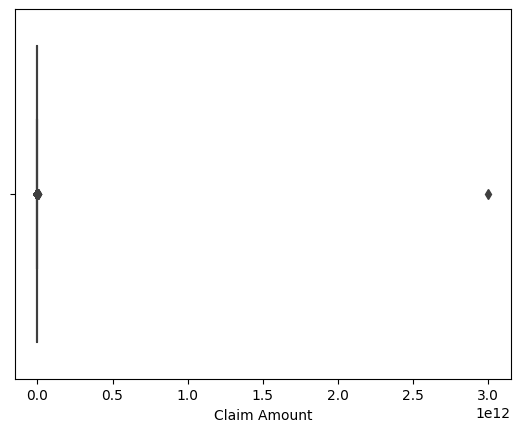

In [68]:
sns.boxplot(data=df, x ='Claim Amount')

Terlihat ada 24394 data outliers atau 12,19% data dari kolom `Claim Amount`. Dari grafik boxplot diatas terlihat data ini *positively skewed*

In [69]:
# Mencari nilai Q1,Q3, serta nilai IQR dari Close Amount
close_amount_Q1 = df['Close Amount'].quantile(0.25) 
close_amount_Q3 = df['Close Amount'].quantile(0.75) 
close_amount_IQR = close_amount_Q3 - close_amount_Q1

close_amount_outliers = df[(df['Close Amount'] < (close_amount_Q1 - 1.5 * close_amount_IQR)) | (df['Close Amount'] > (close_amount_Q3 + 1.5 * close_amount_IQR))]

print(f'Number of close amount outliers = {len(close_amount_outliers)}')
print(f'Percentage of close amount outliers = {round(len(close_amount_outliers)/len(df)*100, 2)}%')

Number of close amount outliers = 26158
Percentage of close amount outliers = 13.08%


<Axes: xlabel='Close Amount'>

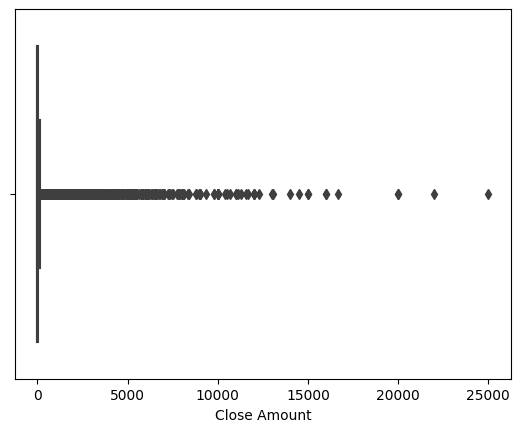

In [99]:
sns.boxplot(data=df, x ='Close Amount')

Terlihat ada 26158 data outliers atau 13,08% data dari kolom `Close Amount`. Dari grafik boxplot diatas terlihat data ini *positively skewed*

In [98]:
# drop data outliers dari Claim Amount dan Close Amount
df = df.drop(df['Claim Amount'].idxmax())
df = df.drop(df['Close Amount'].idxmax())



## Data yang sudah bersih

In [72]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(200057, 15)


,dataFeatures,dataType,null,unique,uniqueSample
0,Claim Number,object,0,200057,"[2015062523420, 2005111496049]"
1,Date Received,datetime64[ns],0,3919,"[2014-10-25T00:00:00.000000000, 2002-07-12T00:00:00.000000000]"
2,Incident Date,datetime64[ns],0,5002,"[2015-09-13T00:00:00.000000000, 2008-01-29T00:00:00.000000000]"
3,Airport Code,object,0,464,"[SHD, LAN]"
4,Airport Name,object,0,464,"[Boston (Logan) International Airport, Glynco Jetport]"
5,Airline Name,object,0,233,"[Wiggins Airways, Skywest Airlines Inc USA]"
6,Claim Type,object,0,10,"[Property Damage, Bus Terminal]"
7,Claim Site,object,0,5,"[Motor Vehicle, Bus Station]"
8,Item,object,0,4678,"[Boxes - Jewelry; Cigarette; Music; etc.; Currency; Locks; Other, Clothing - Shoes; belts; accessories; etc.; Medical Equipment & Insturments]"
9,Claim Amount,float64,0,35783,"[693.33, 198.38]"


Setelah dibersihkan kini dataframe saya memiliki 20047 baris yang sebelumnya 204267. Sekitar Baris 4000 data yang kosong dihapus dan sisa data kosong diisi dengan nilai yang dirasa relevan

# Data Analysis

## Dimana insiden paling banyak terjadi ?

In [73]:
# Membuat fungsi untuk melakukan pengelompokan berdasarkan presentasenya
def groupby_percentage(df, col) :
    df = df.groupby(col)['Claim Number'].count().to_frame().reset_index()
    df = df.rename(columns={'Claim Number':'Number of Incidents'})
    df['Percentage'] = df['Number of Incidents']/sum(df['Number of Incidents'])*100

    return df

In [74]:
df_airport = groupby_percentage(df, ['Airport Code', 'Airport Name'])
df_airport = df_airport.sort_values('Number of Incidents', ascending=False).head(10)
df_airport

,Airport Code,Airport Name,Number of Incidents,Percentage
245,LAX,Los Angeles International Airport,16687,8.341123
231,JFK,John F. Kennedy International,9128,4.562700
137,EWR,Newark International Airport,6776,3.387035
320,ORD,Chicago O'Hare International Airport,6744,3.371039
287,MIA,Miami International Airport,6339,3.168597
275,MCO,Orlando International Airport,6327,3.162599
27,ATL,Hartsfield-Jackson Atlanta International Airport,5798,2.898174
397,SEA,Seattle-Tacoma International,5346,2.672238
338,PHX,Phoenix Sky Harbor International,4999,2.498788
243,LAS,McCarran International,4992,2.495289


[Text(0, 0, '0 K'),
 Text(0, 2000, '2 K'),
 Text(0, 4000, '4 K'),
 Text(0, 6000, '6 K'),
 Text(0, 8000, '8 K'),
 Text(0, 10000, '10 K'),
 Text(0, 12000, '12 K'),
 Text(0, 14000, '14 K'),
 Text(0, 16000, '16 K'),
 Text(0, 18000, '18 K')]

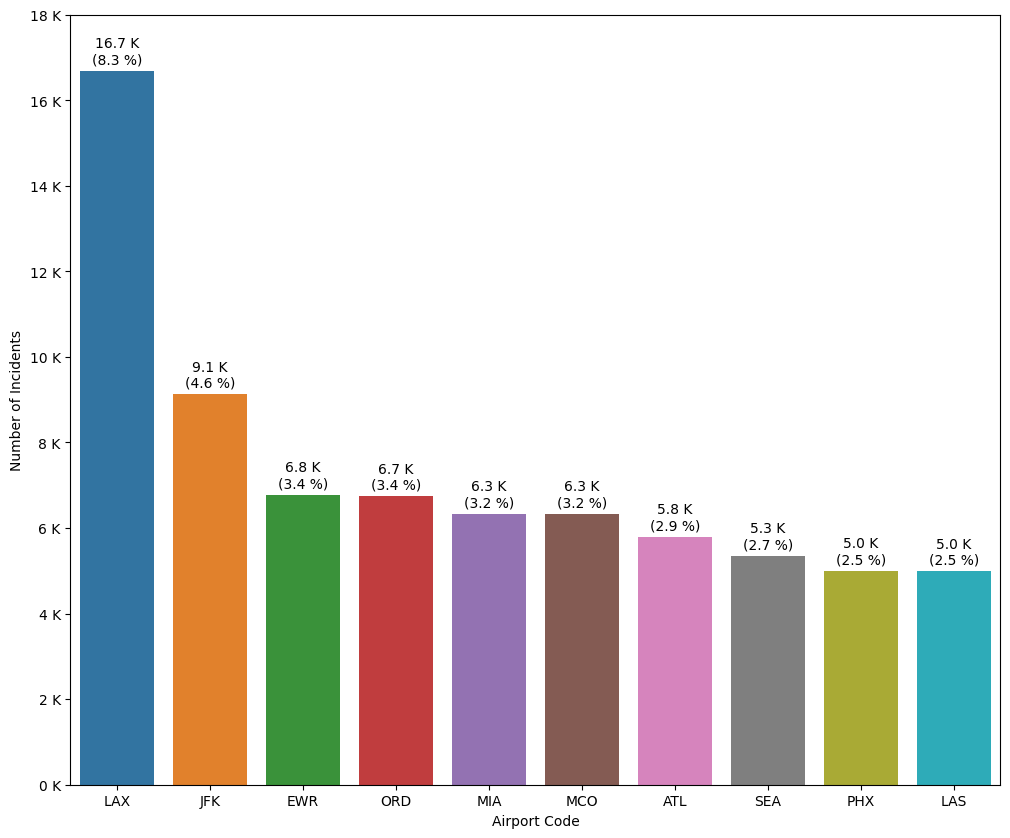

In [75]:
# memunculkan barplot jumlah terjadinya insiden dan kode airport terkait
plt.figure(figsize=(12,10))
fig = sns.barplot(data= df_airport, x = 'Airport Code', y = 'Number of Incidents')

# menambah label jumlah insiden dalam format K dan presentasenya pada setiap barplot
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000, df_airport['Percentage'])]
fig.bar_label(fig.containers[0], labels=label, padding=3)


# mengubah label sumbu y dengan format ribuan diubah menjadi K
ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()/1000)]
fig.set_yticks(range(0,18001, 2000))
fig.set_yticklabels(ytick_label)





**Interpretasi :** Berdasarkan data claim bandara di Amerika Serikat pada tahun 2002 sampai dengan 2015, Insiden claim paling banyak terjadi pada bandara LAX atau Los Angeles International Airport dengan presentase 8,3%, kemudian posisi kedua diikuti oleh bandara JFK atau John F. Kennedy International yaitu sebesar 4,6%, kemudian posisi tiga adalah bandara EWR atau Newark International Airport dengan presentase 3,4%

## Dimana Claim Site paling banyak terjadinya insiden ?

In [76]:
df_claimsite = groupby_percentage(df, ['Claim Site'])
df_claimsite = df_claimsite.sort_values('Number of Incidents', ascending=False).head(10)
df_claimsite

,Claim Site,Number of Incidents,Percentage
1,Checked Baggage,158330,79.142444
2,Checkpoint,39571,19.779863
4,Other,1667,0.833263
3,Motor Vehicle,473,0.236433
0,Bus Station,16,0.007998


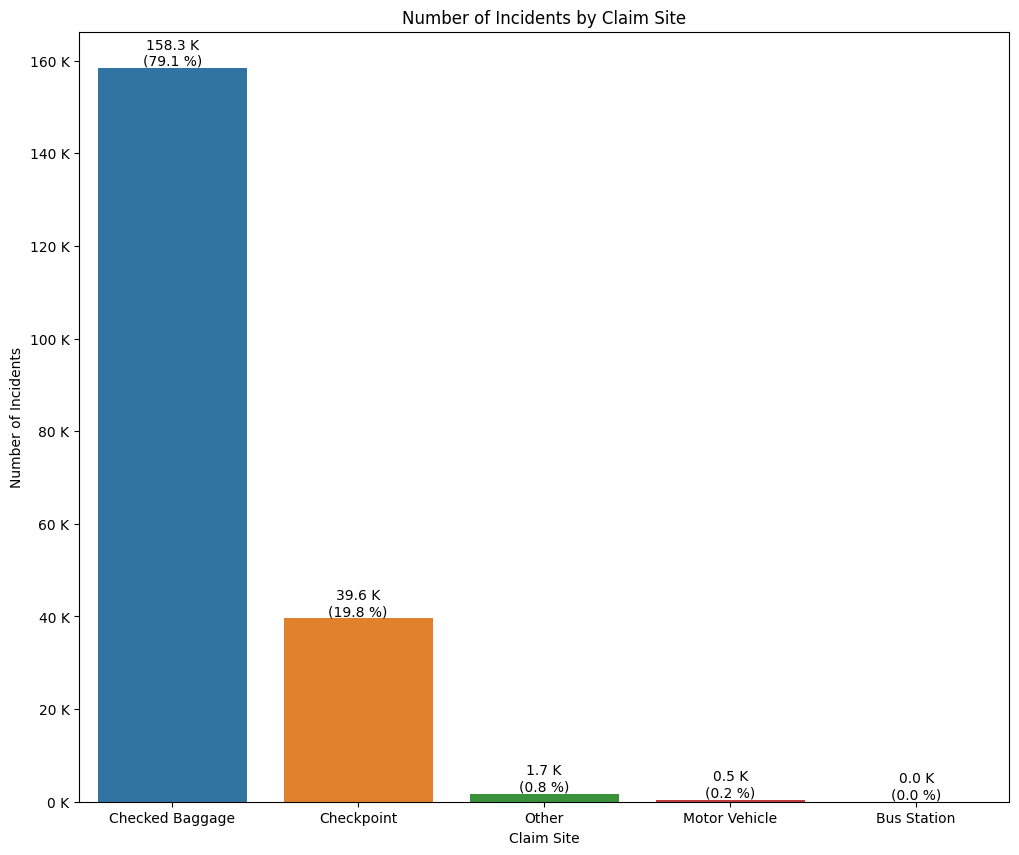

In [77]:
plt.figure(figsize=(12,10))
fig = sns.barplot(data= df_claimsite, x = 'Claim Site', y = 'Number of Incidents')

percentage = df['Claim Site'].value_counts()/len(df)*100
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000,percentage)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()[:-1]/1000)]
fig.set_yticks(range(0,160001, 20000))
fig.set_yticklabels(ytick_label)

plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Claim Site')



plt.show()

**Interpretasi :** Berdasarkan data claim bandara di Amerika Serikat pada tahun 2002 sampai dengan 2015, temppat paling banyak insiden adalah di Checked Baggage dan Check Point. Hal ini wajar karena kebanyakan penumpang harus melakukan pengecekan dikedua tempat ini.


## Jenis klaim apa saja yang paling banyak diajukan ?

In [78]:
df_claimtype = groupby_percentage(df, ['Claim Type'])
df_claimtype = df_claimtype.sort_values('Number of Incidents', ascending=False).head(10)
df_claimtype

,Claim Type,Number of Incidents,Percentage
5,Passenger Property Loss,122979,61.471980
8,Property Damage,74271,37.124919
7,Personal Injury,1452,0.725793
3,Employee Loss (MPCECA),477,0.238432
6,Passenger Theft,452,0.225936
4,Motor Vehicle,371,0.185447
1,Complaint,47,0.023493
9,Wrongful Death,4,0.001999
2,Compliment,3,0.001500
0,Bus Terminal,1,0.000500


Text(0.5, 1.0, 'Number of Incidents by Claim Type')

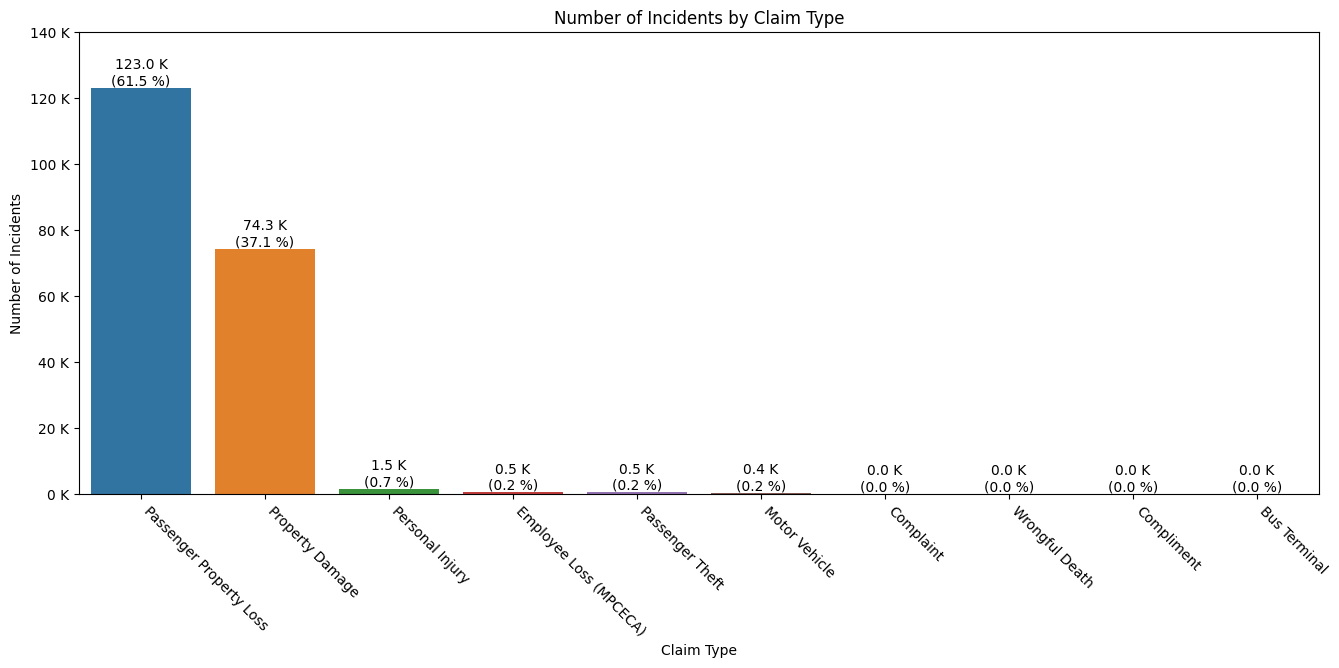

In [79]:
plt.figure(figsize=(16,6))
fig = sns.barplot(data= df_claimtype, x = 'Claim Type', y = 'Number of Incidents')

percentage = df['Claim Type'].value_counts()/len(df)*100
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000,percentage)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()/1000)]
fig.set_yticks(range(0,140001, 20000))
fig.set_yticklabels(ytick_label)


plt.xticks(rotation= -45, ha = 'left')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Claim Type')


**Interpretasi :** Berdasarkan data claim bandara di Amerika Serikat pada tahun 2002 sampai dengan 2015, Tipe Klaim yang paling banyak diajukan adalah Passanger Property Loss dan Property Damage dengan presentase secara berturut-turut 61,5% dan 37,1%. Hal ini sejalan dengan interpretasi sebelumnya yaitu tempat paling banyak terjadi ada di Baggage Checking sehingga jenis klaim yang paling banyak diajukan adalah properti yang hilang ataupun rusak


## Jenis item apa yang paling banyak diklaim ?

In [80]:
# melakukan pengelokmpokan item berdasarkan kolom item group dan kolom item pada dataframe utama dan menghitung presentase nya
item_dict['Other'] = ['']

df_item = pd.DataFrame()
for i, j in item_dict.items():
    item = i
    value = df['Item Group'].str.contains(i).sum()

    row = pd.DataFrame([[item, value,]], columns=['Item', 'Number of Claims'])
    df_item = pd.concat([df_item, row], ignore_index= True)

df_item = df_item.sort_values('Number of Claims', ascending=False)
df_item['Percentage'] = df_item['Number of Claims']/len(df)*100
df_item

,Item,Number of Claims,Percentage
9,Other,58238,29.110703
1,Electronic,40344,20.166253
2,Luggage,30941,15.466092
5,Lock,30805,15.398112
0,Clothing,25018,12.505436
3,Jewelry,17939,8.966944
4,Accessories,14125,7.060488
6,Cosmetic & Medicine,12265,6.130753
8,Tool & Equipment,4333,2.165883
7,Currency,4098,2.048416


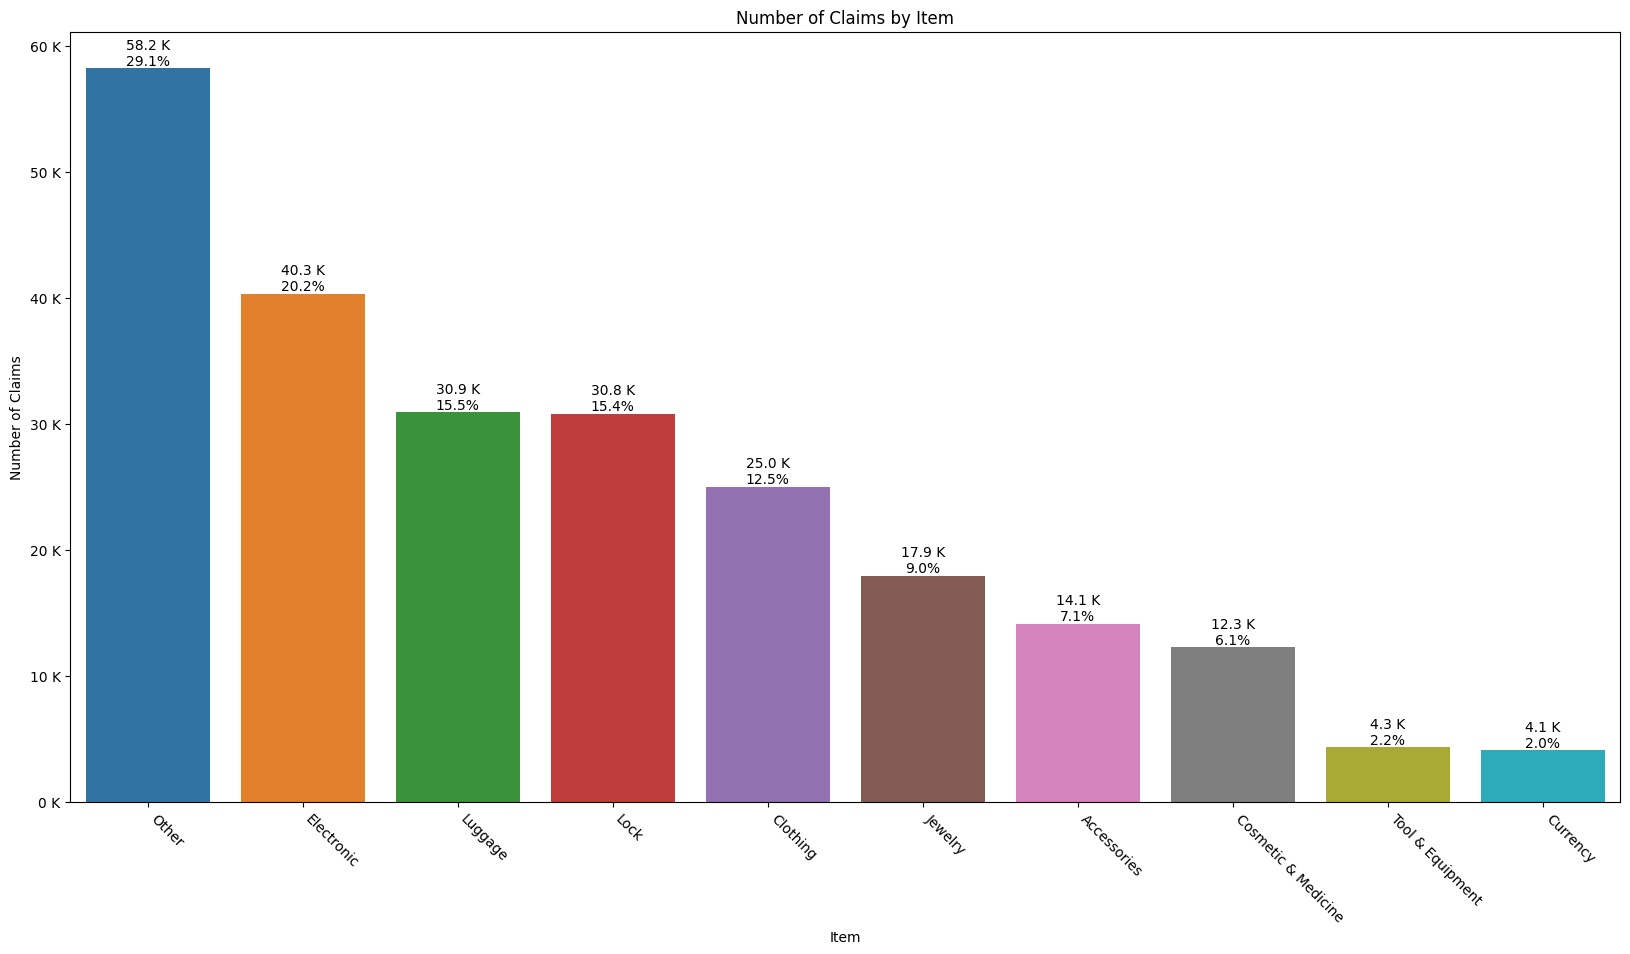

In [81]:
plt.figure(figsize=(20,10))
fig = sns.barplot(data= df_item, x = 'Item', y = 'Number of Claims')

label = ['{:,.1f} K\n{:.1f}%'.format(x,y) for x,y in zip ((fig.containers[0].datavalues/1000), df_item['Percentage'])]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()[:-1]/1000)]
fig.set_yticks(range(0,60001, 10000))
fig.set_yticklabels(ytick_label)

plt.xticks(rotation= -45, ha = 'left')
plt.title('Number of Claims by Item')

plt.show()

**Interpretasi :** Berdasarkan data claim bandara di Amerika Serikat pada tahun 2002 sampai dengan 2015, jenis barang yang paling banyak diklaim adalah other yaitu barang yang tidak termasuk dalam 9 kategori tersebut sebesar 29,2%, kemudian diikuti oleh barang elektronik sebesar 20% dan di posisi ketiga ada luggage dengan presentase 15,5%. TSA harus dalam mengecek baggage yang mengandung barang elektronik karena barang ini paling banyak hilang atau rusak. Kemudian kerusakan atau kehilangan luggage juga perlu diperhatikan dalam melakukan pengecekan

## Kapan insiden paling banyak terjadi, bagaimana tren dalam lima tahun terakhir ?

In [82]:
# sorting data insiden mulai dari tahun 2011
df_2011_2015 = df[df['Incident Date'].dt.year >= 2011]

# membuat data banyaknya jumlah insiden berdasarkan bulan dan tahun terjadinya mulai dari 2011
df_trend = df_2011_2015.groupby(df['Incident Date'].dt.to_period('M'))['Claim Number'].count().to_frame().reset_index()
df_trend = df_trend.rename(columns={'Incident Date': 'Month', 'Claim Number':'Number of Incidents'})
df_trend['Month Number'] = df_trend['Month'].dt.month
df_trend['Month'] = df_trend['Month'].astype('str')
df_trend.head()

,Month,Number of Incidents,Month Number
0,2011-01,887,1
1,2011-02,727,2
2,2011-03,971,3
3,2011-04,944,4
4,2011-05,945,5


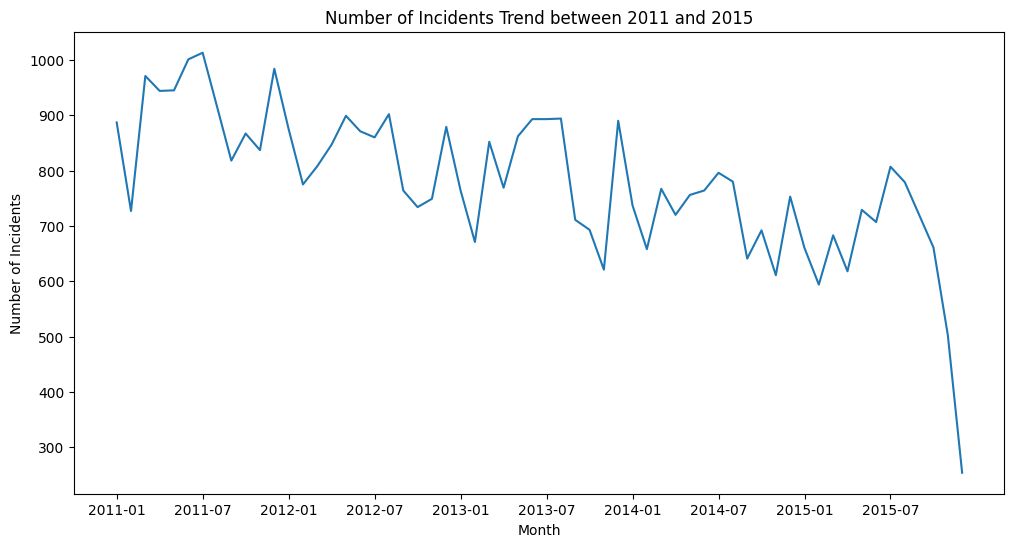

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_trend, x='Month', y= 'Number of Incidents')


plt.xticks(range(0,60,6))
plt.title('Number of Incidents Trend between 2011 and 2015')

plt.show()

**Interpretasi :** Dilihat dari grafik garis jumlah kejadian insiden antara 2011 sampai 2015, terlihat garis trendline yang menurun yang artinya sudah ada peningkatan perbaikan pelayanan selama rentang tahun tersebut. 

In [84]:
# membuat fungsi untuk membuat grafik tren bulanan berdasarkan rentang tahun
def trend_month(df):
    df_trend = df.groupby(df['Incident Date'].dt.to_period('M'))['Claim Number'].count().to_frame().reset_index()
    df_trend = df_trend.rename(columns={'Incident Date': 'Month', 'Claim Number':'Number of Incidents'})
    df_trend['Month Number'] = df_trend['Month'].dt.month
    df_trend['Month'] = df_trend['Month'].astype('str')

    df_trend_month = df_trend.groupby('Month Number')['Number of Incidents'].mean().to_frame().reset_index()
    df_trend_month = df_trend_month.rename(columns={'Month Number': 'Month'})

    plt.figure(figsize=(14,6))
    fig = sns.barplot(data= df_trend_month, x = 'Month', y = 'Number of Incidents')
    label = ['{:,.1f}'.format(x) for x in fig.containers[0].datavalues]
    fig.bar_label(fig.containers[0], labels=label)

    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title("Average Number of Incidents by Month")

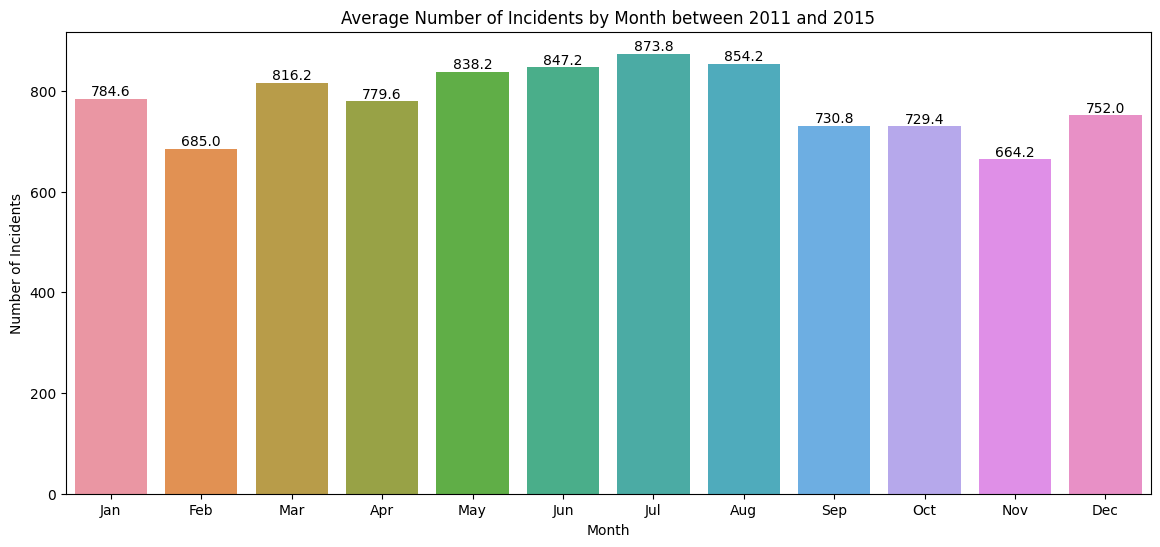

In [85]:
trend_month(df_2011_2015)
plt.title('Average Number of Incidents by Month between 2011 and 2015')
plt.show()

**Interpretasi :** Dalam rentang tahun 2011 sampai dengan 2015, jumlah insiden paling banyak terjadi pada bulan july dan paling rendah terjadi pada bulan November, hal ini harus dianalisa lebih lanjut apakah jumlah penerbangan terjadi titik puncak pada bulan july? jika iya maka hal ini wajar terjadi.

## Bagaimana hasil akhir dari proses klaim ?


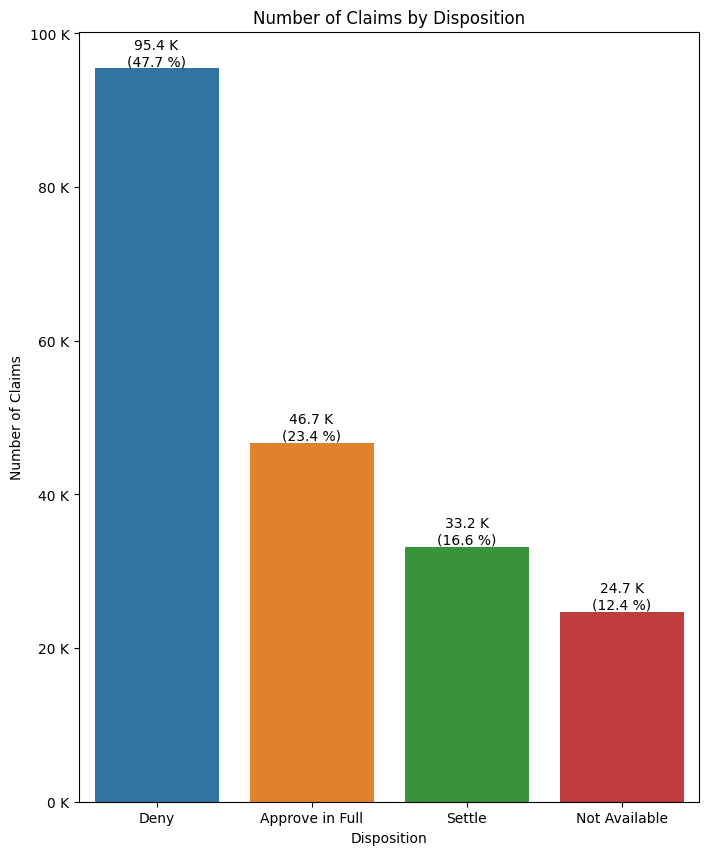

In [86]:
plt.figure(figsize=(8,10))
fig = sns.countplot(data= df, x = 'Disposition', order=df['Disposition'].value_counts().index)

percentage = df['Disposition'].value_counts()/len(df)*100
label = ['{:,.1f} K\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues/1000,percentage)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()[:-1]/1000)]
fig.set_yticks(range(0,100001, 20000))
fig.set_yticklabels(ytick_label)

plt.ylabel('Number of Claims')
plt.title('Number of Claims by Disposition')

plt.show()

In [87]:
df.insert(3, 'Incident Year', value='')
df['Incident Year'] = df['Incident Date'].dt.year
df.head()

,Claim Number,Date Received,Incident Date,Incident Year,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Item Group,Status,Close Amount,Disposition,Disposition Group
7,12772,2002-06-20,2002-05-09,2002,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Clothing,Approve in Full,75.0,Approve in Full,Approved or Settled
8,14268,2002-06-20,2002-06-16,2002,PHX,Phoenix Sky Harbor International,Southwest Airlines,Property Damage,Checkpoint,Computer - Laptop,2270.09,Electronic,Canceled,0.0,Not Available,Denied or Not Available
9,2004102965797,2002-06-25,2002-05-04,2002,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Jewelry,Deny,0.0,Deny,Denied or Not Available
12,14460,2002-07-08,2002-06-12,2002,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.71,Accessories,Approve in Full,17.0,Approve in Full,Approved or Settled
13,13334,2002-07-08,2002-06-04,2002,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Clothing,Canceled,0.0,Not Available,Denied or Not Available


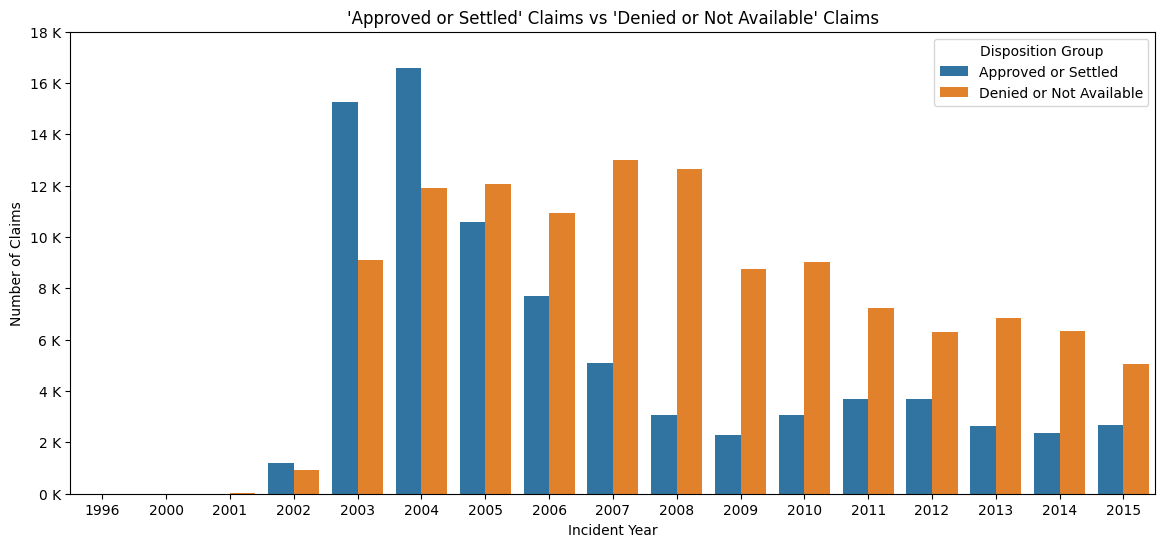

In [88]:
plt.figure(figsize=(14,6))
fig = sns.countplot(data=df, x = 'Incident Year', hue='Disposition Group')

ytick_label = ['{:,.0f} K'.format(x) for x in (fig.get_yticks()/1000)]
fig.set_yticks(range(0,18001, 2000))
fig.set_yticklabels(ytick_label)

plt.ylabel('Number of Claims')
plt.title("'Approved or Settled' Claims vs 'Denied or Not Available' Claims")

plt.show()

**Interpretasi :** Selama rentang waktu 2002 sampai 2015 sebesar 47,7% dari jumlah total klaim ditolak oleh TSA. Jumlah penerimaan klaim tertinggi terjadi pada tahun 2003 dan totalnya terus turun hingga tahun seterusnya. Hal ini harus dianalisa mengapa jumlah klaim yang awalnya sangat tinggi pada tahun 2003 dan 2004 kemudian bisa berangsur turun ke angka yang cukup rendah.

## Berapa jumlah nilai klaim yang dibayarkan untuk klaim yang disetujui ?

In [100]:
# df baru yang hanya mengambil data claim yang disetujui 
df_approved_settled = df[df['Disposition Group']=='Approved or Settled']
df_approved_settled[['Close Amount']].describe()

,Close Amount
count,79895.000000
mean,172.164069
std,444.938538
min,0.000000
25%,27.000000
50%,65.000000
75%,165.705000
max,25000.000000


<ipython-input-90-4b40b475a3e7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  fig = sns.barplot(data= df_approved_settled, x = 'Incident Year', y = 'Close Amount', estimator=sum, ci=0)


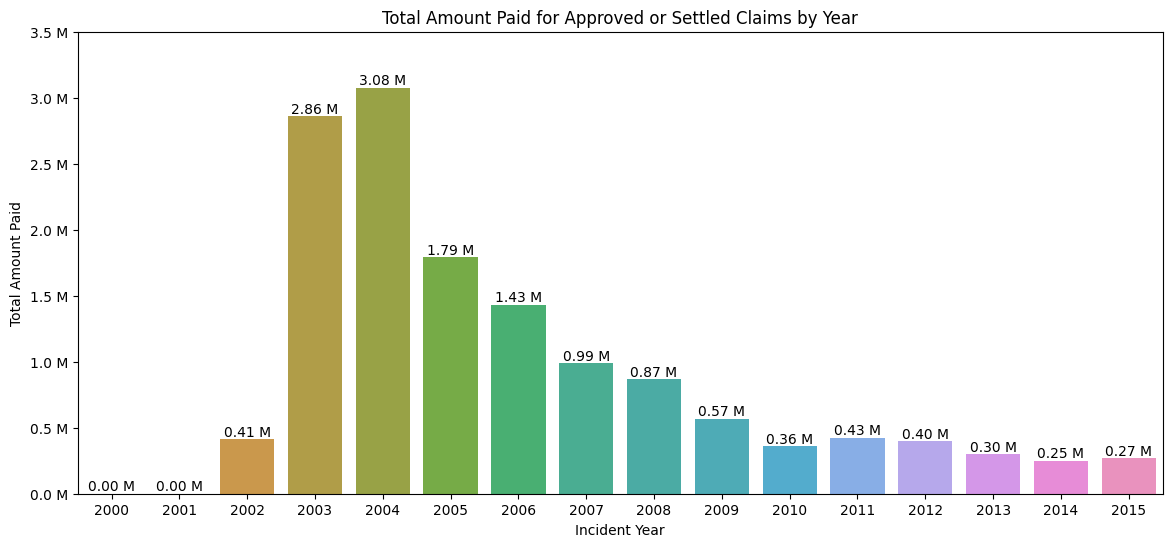

In [90]:
plt.figure(figsize=(14,6))
fig = sns.barplot(data= df_approved_settled, x = 'Incident Year', y = 'Close Amount', estimator=sum, ci=0)

label = ['{:,.2f} M'.format(x) for x in (fig.containers[0].datavalues/1000000)]
fig.bar_label(fig.containers[0], labels=label)

ytick_label = ['{:,.1f} M'.format(x) for x in (fig.get_yticks()/1000000)]
fig.set_yticks(range(0,3500001, 500000))
fig.set_yticklabels(labels=ytick_label)

plt.ylabel('Total Amount Paid')
plt.title("Total Amount Paid for Approved or Settled Claims by Year")

plt.show()

Total jumlah nilai klaim  yang dibayarkan tertinggi yaitu pada tahun 2004 sebesar USD 2.95M dan trennya terus turun sampai 2015 hanya sebesar USD 0.27M, hal ini sejalan dengan jumlah klaim yang disetujui pula. Pada deskripsi statistik kita juga bisa melihat nilai klaim tertinggi yang pernah disetujui yaitu sebesar USD 25.000 dan rata-ratanya jumlah nilai tiap klaim yang disetujui sebesar USD 172, terlihat simpangannya yang sangat jauh.

## Tipe klaim apa yang memiliki rataan nilai klaim tertinggi
Untuk analisis ini saya akan melihat distribusi data `Close Amount ` berdasarkan `Claim Type` yang hanya pada klaim yang disetujui



In [91]:
df_approved_settled.groupby('Claim Type').describe()['Close Amount']

,count,mean,std,min,25%,50%,75%,max
Claim Type,,,,,,,,
Bus Terminal,1.0,0.000000,NaN,0.00,0.0000,0.000,0.000,0.00
Complaint,5.0,69.670000,65.325680,25.00,37.6000,50.000,50.750,185.00
Employee Loss (MPCECA),271.0,169.093173,274.957583,0.00,29.6850,80.670,202.280,2929.51
Motor Vehicle,203.0,1410.049852,1570.279236,0.00,500.0000,1000.000,1828.985,11672.23
Passenger Property Loss,43176.0,164.337078,382.583931,0.00,25.0000,70.000,173.000,16000.00
Passenger Theft,246.0,237.260650,704.405525,5.39,49.9925,87.475,202.050,9999.99
Personal Injury,248.0,3099.498387,10896.737471,0.00,164.4325,634.150,2500.000,125000.00
Property Damage,35748.0,161.020928,354.091402,0.00,30.0000,60.000,150.000,15000.00


In [92]:
print(f'Close Amount Average by Claim Type')
for i in df_approved_settled['Claim Type'].unique():
    mean = df_approved_settled[df_approved_settled['Claim Type'] == i]['Close Amount'].mean()
    print(f'{i}: {mean:,.0f}')
    

Close Amount Average by Claim Type
Passenger Property Loss: 164
Property Damage: 161
Motor Vehicle: 1,410
Personal Injury: 3,099
Passenger Theft: 237
Employee Loss (MPCECA): 169
Bus Terminal: 0
Complaint: 70


Text(0.5, 1.0, 'Close Amount Distribution by Claim Type')

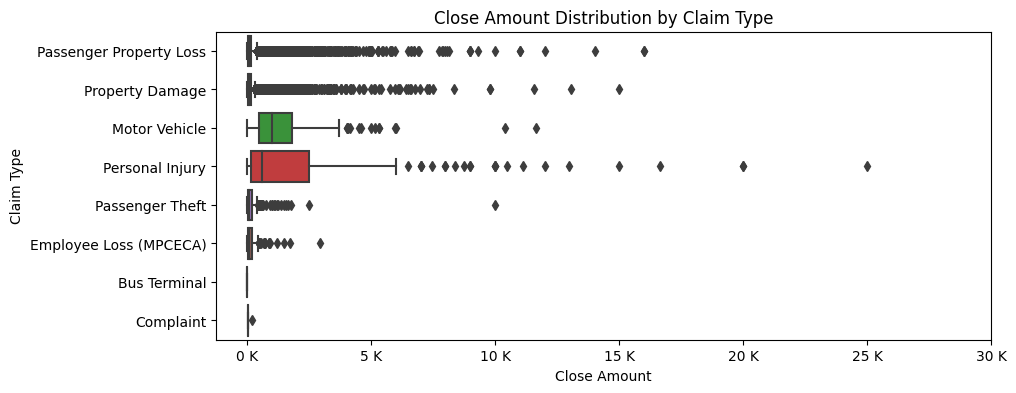

In [101]:
plt.figure(figsize=(10,4))
fig = sns.boxplot(data = df_approved_settled, y='Claim Type', x='Close Amount')

xtick_label = ['{:,.0f} K'.format(x) for x in (fig.get_xticks()[1:]/1000)]
fig.set_xticks(range(0,30001, 5000))
fig.set_xticklabels(labels=xtick_label)

plt.title('Close Amount Distribution by Claim Type')


Sekarang saya akan melakukan **Tes Hipotesis melakukan Anova Test**. Berdasarkan central limit theorem data akan memiliki sifat distribusi normal apabila sample size >= 30. Karena dari itu digunakan Anova

Ho: Semua tipe klaim memiliki nilai rata-rata close amount yang sama 
Ha: Setidaknya salah satu  claim type memiliki satu rataan close amount yang berbeda dari yang lainnya 



In [102]:
claim_type = df['Claim Type'].unique()
stats, pvalue = f_oneway(*[df_approved_settled[df_approved_settled['Claim Type'] == i]['Close Amount'] for i in claim_type])
stats


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


nan

In [103]:
claim_type = df['Claim Type'].unique()
groups = [df[df['Claim Type'] == i]['Close Amount'] for i in claim_type]
f_stat, pvalue = f_oneway(*groups)

if pvalue < 0.05:
    print(f"Nilai pvalue adalah {pvalue:8f} dan lebih kecil daripada  0.05, Terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan tipe klaim.")
else:
    print(f"Nilai pvalue {pvalue} dan lebih besar daripada 0.05, Tidak terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan tipe klaim.")

Nilai pvalue adalah 0.000000 dan lebih kecil daripada  0.05, Terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan tipe klaim.


**Interpretasi :** Rata-rata jumlah klaim terbesar berdasarkan jenis klaimnya adalah personal injury yaitu sebesar 3000 USD kemudian diikuti motor vehicle sebesar USD 1400. Hal ini dibuktikan dengan test Anova yang membuktikan bahwa ada beberapa claim type yang nilai rataannya lebih tinggi dari nilai rataan claim type yang lain. Terlihat walaupun jumlah klaimnya sedikit namun nilai klaim yang dibayarkan cukup besar.`

### Dimana insiden Personal Injury paling banyak terjadi ?


In [104]:
df_personal_injury = df[df['Claim Type'] == 'Personal Injury']

df_personal_injury_by_AC = groupby_percentage(df_personal_injury, 'Airport Code')
df_personal_injury_by_AC = df_personal_injury_by_AC.sort_values('Number of Incidents', ascending=False).head()
df_personal_injury_by_AC

,Airport Code,Number of Incidents,Percentage
89,LAX,93,6.435986
97,MCO,50,3.460208
84,JFK,50,3.460208
88,LAS,48,3.321799
121,PHX,46,3.183391


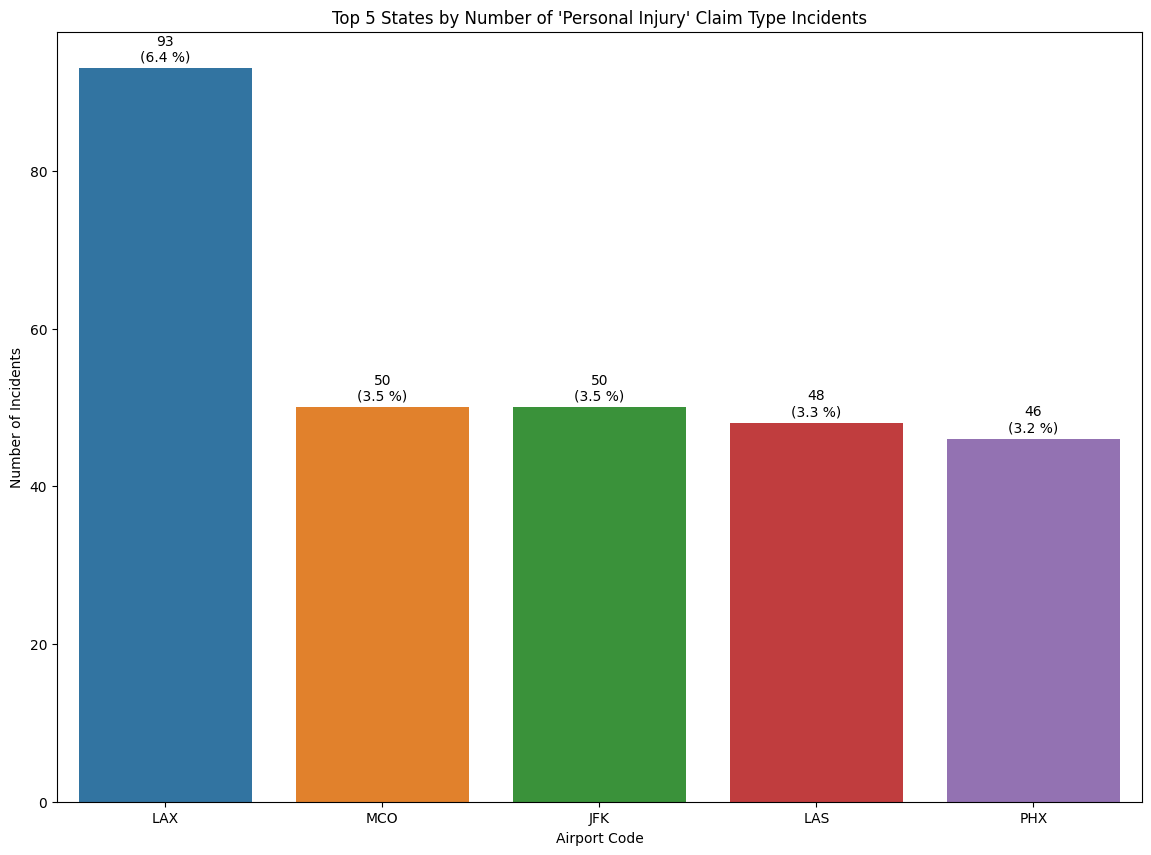

In [105]:
plt.figure(figsize=(14,10))
fig = sns.barplot(data= df_personal_injury_by_AC, x = 'Airport Code', y = 'Number of Incidents')

label = ['{:.0f}\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues, df_personal_injury_by_AC['Percentage'])]
fig.bar_label(fig.containers[0], labels=label, padding=3)

plt.title("Top 5 States by Number of 'Personal Injury' Claim Type Incidents")

plt.show()

insiden `Personal Injury` paling banyak terjadi di bandara LAX yaitu Los Angeles International Airport yaitu dengan presentase sebesar 6.4%. Hal ini harus menjadi perhatian bandara tersebut mengapa insiden dengan tipe ini sering terjadi

## Claim Site mana yang memiliki rataan nilai claim tertinggi ?
Untuk analisis ini saya akan melihat distribusi data `Close Amount ` berdasarkan `Claim Site`


In [106]:
df_approved_settled.groupby('Claim Site').describe()['Close Amount']

,count,mean,std,min,25%,50%,75%,max
Claim Site,,,,,,,,
Bus Station,1.0,400.000000,NaN,400.0,400.0000,400.0,400.000,400.0
Checked Baggage,60017.0,137.728981,310.917730,0.0,25.0000,58.0,143.490,15000.0
Checkpoint,19154.0,257.241453,629.430229,0.0,37.8050,100.0,250.000,25000.0
Motor Vehicle,253.0,1643.149289,2348.709583,0.0,490.0600,1000.0,1835.000,20000.0
Other,470.0,309.890362,759.396543,0.0,42.1475,100.0,226.555,9817.2


Close Amount Mean by Claim Site
Checkpoint: 257
Other: 310
Checked Baggage: 138
Motor Vehicle: 1,643
Bus Station: 400


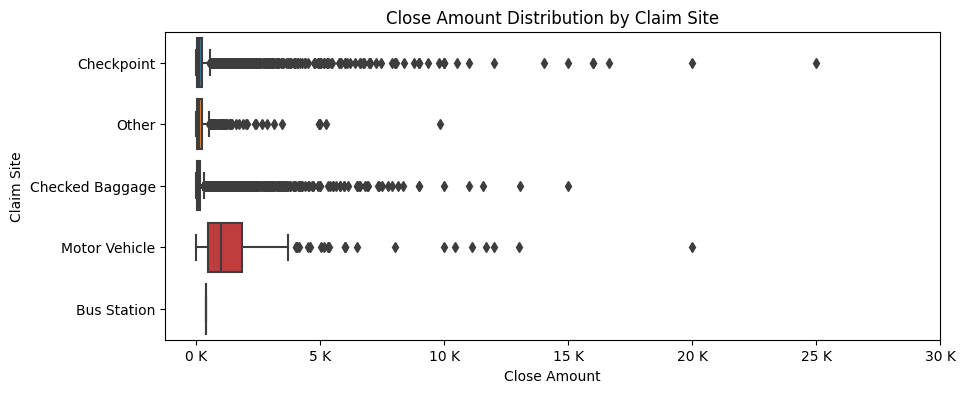

In [107]:
print(f'Close Amount Mean by Claim Site')
for i in df_approved_settled['Claim Site'].unique():
    mean = df_approved_settled[df_approved_settled['Claim Site'] == i]['Close Amount'].mean()
    print(f'{i}: {mean:,.0f}')

plt.figure(figsize=(10,4))
fig = sns.boxplot(data = df_approved_settled, y='Claim Site', x='Close Amount')

xtick_label = ['{:,.0f} K'.format(x) for x in (fig.get_xticks()[1:]/1000)]
fig.set_xticks(range(0,30001, 5000))
fig.set_xticklabels(labels=xtick_label)

plt.title('Close Amount Distribution by Claim Site')


plt.show()

Sekarang saya akan melakukan **Tes Hipotesis melakukan Anova Test**. Berdasarkan central limit theorem data akan memiliki sifat distribusi normal apabila sample size >= 30. Karena dari itu digunakan Anova

Ho: Semua Claim Site memiliki rataan Close Amount yang sama
Ha: Setidaknya salah satu  Claim Type memiliki rataan Close Amount yang berbeda dari yang lainnya 



In [108]:
claim_type = df['Claim Site'].unique()
groups = [df[df['Claim Site'] == i]['Close Amount'] for i in claim_type]
f_stat, pvalue = f_oneway(*groups)

if pvalue < 0.05:
    print(f"Nilai pvalue adalah {pvalue:8f} dan lebih kecil daripada  0.05, Terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan Claim Site.")
else:
    print(f"Nilai pvalue {pvalue} dan lebih besar daripada 0.05, Tidak terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan tipe Claim Site.")

Nilai pvalue adalah 0.000000 dan lebih kecil daripada  0.05, Terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan Claim Site.


Klaim yang terjadi pada Motor Vehicle memiliki nilai rataan klaim yang tertinggi yaitu USD 1643. Hal ini dibuktikan dengan test Anova yang membuktikan bahwa ada beberapa Claim Site yang nilai rataannya lebih tinggi dari nilai rataan Claim Site yang lain. Lagi-lagi walaupun jumlah klaimnya sedikit namun nilai klaim yang dibayarkan cukup besar.

### Dimana insiden pada `Motor Vehicle` paling sering terjadi ?

In [109]:
df_motor_vehicle = df[df['Claim Site'] == 'Motor Vehicle']

df_motor_vehicle_by_airport_code = groupby_percentage(df_motor_vehicle, ['Airport Code', 'Airport Name'])
df_motor_vehicle_by_airport_code = df_motor_vehicle_by_airport_code.sort_values('Number of Incidents', ascending=False).head()
df_motor_vehicle_by_airport_code

,Airport Code,Airport Name,Number of Incidents,Percentage
63,ZZX,Non TSA Airport (motor vehicle),274,58.050847
61,TSA,TSA - Non-Specified Airport,30,6.355932
24,I,Insurance Subrogation Claim,17,3.601695
21,HDQ,Headquarters,12,2.542373
27,JFK,John F. Kennedy International,9,1.906780


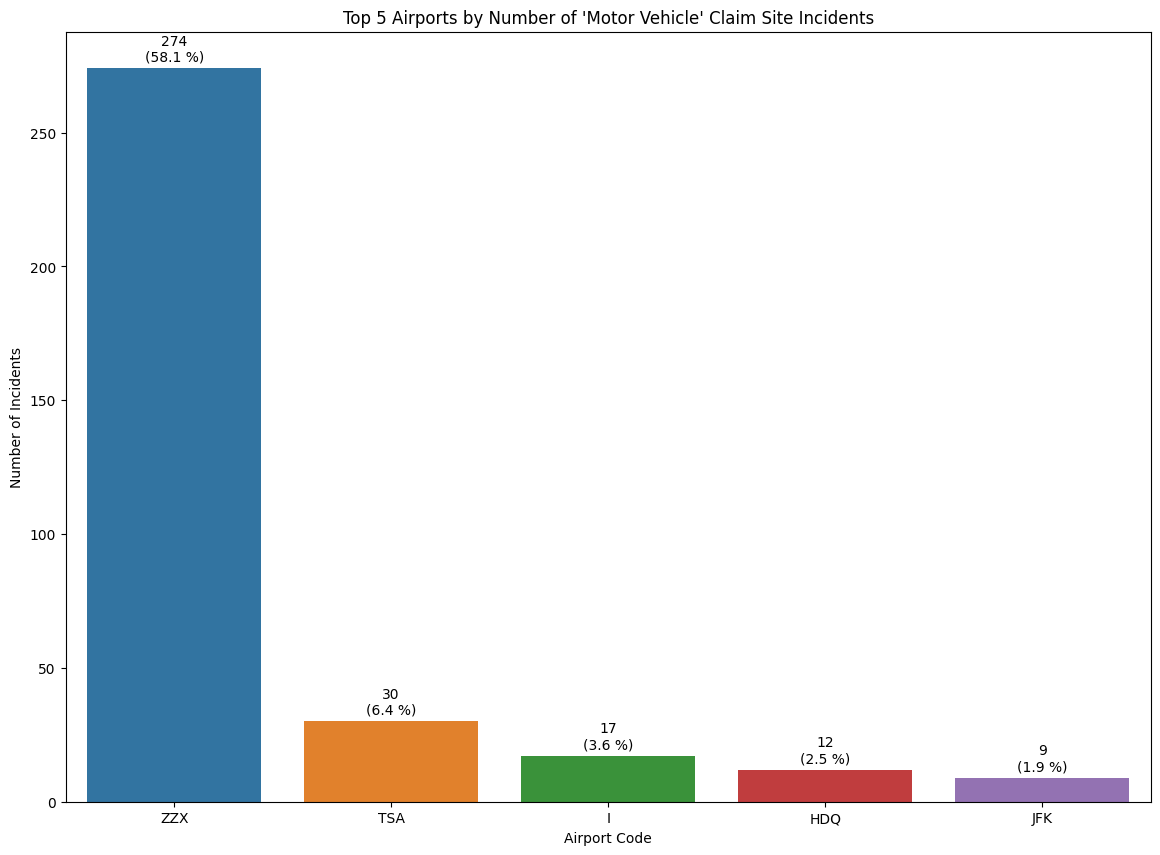

In [110]:
plt.figure(figsize=(14,10))
fig = sns.barplot(data= df_motor_vehicle_by_airport_code, x = 'Airport Code', y = 'Number of Incidents')

label = ['{:.0f}\n({:.1f} %)'.format(x, y) for x, y in zip(fig.containers[0].datavalues, df_motor_vehicle_by_airport_code['Percentage'])]
fig.bar_label(fig.containers[0], labels=label, padding=3)

plt.title("Top 5 Airports by Number of 'Motor Vehicle' Claim Site Incidents")
plt.show()

Kebanyakan kejadian insiden pada `Claim Site` di `Motor Vehicle` terkadi pada aiport code ZZX yang mana merupakan Non-TSA Aiport. Artinya insiden klaim seperti ini terjadi diluar area airport

## Item mana yang memiliki rataan Close Amount tertinggi ?

In [111]:
item_amount_paid = pd.DataFrame()
for i, j in item_dict.items():
    item = i
    median = df_approved_settled[df_approved_settled['Item Group'].str.contains(i)]['Close Amount'].median()
    mean = df_approved_settled[df_approved_settled['Item Group'].str.contains(i)]['Close Amount'].mean()
    max = df_approved_settled[df_approved_settled['Item Group'].str.contains(i)]['Close Amount'].max()
    row = pd.DataFrame([[item, median, round(mean, 2), max]], 
                        columns=['Item', 'Close Amount Median', 'Close Amount Mean', 'Close Amount Max'])
    item_amount_paid = pd.concat([item_amount_paid, row], ignore_index= True)

item_amount_paid = item_amount_paid.sort_values('Close Amount Mean', ascending=False)
item_amount_paid 

,Item,Close Amount Median,Close Amount Mean,Close Amount Max
3,Jewelry,150.00,383.07,16000.00
1,Electronic,186.68,318.92,7241.24
7,Currency,100.00,227.56,5300.00
4,Accessories,140.00,211.66,9000.00
8,Tool & Equipment,82.50,196.39,8766.50
9,Other,55.24,160.38,25000.00
0,Clothing,70.00,117.72,20000.00
6,Cosmetic & Medicine,59.34,113.80,8766.50
2,Luggage,50.00,79.77,5800.00
5,Lock,49.00,66.63,11000.00


In [ ]:
plt.figure(figsize=(14,6))
fig = sns.barplot(data= item_amount_paid, x = 'Item', y = 'Close Amount Mean')

label = ['{:,.0f}'.format(x) for x in (fig.containers[0].datavalues)]
fig.bar_label(fig.containers[0], labels=label)

plt.xticks(rotation= -45, ha = 'left')
plt.ylabel('Average Close Amount')
plt.title('Average amount paid by Item')

plt.show()

Sekarang saya akan melakukan **Tes Hipotesis melakukan Anova Test**. 

Ho: Semua Item memiliki rataan Close Amount yang sama

Ha: Setidaknya salah satu Item memiliki rataan Close Amount yang berbeda dari yang lainnya 



In [112]:
claim_type = df['Item'].unique()
groups = [df[df['Item'] == i]['Close Amount'] for i in claim_type]
f_stat, pvalue = f_oneway(*groups)

if pvalue < 0.05:
    print(f"Nilai pvalue adalah {pvalue:8f} dan lebih kecil daripada  0.05, Terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan Item.")
else:
    print(f"Nilai pvalue {pvalue} dan lebih besar daripada 0.05, Tidak terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan tipe Item.")

Nilai pvalue adalah 0.000000 dan lebih kecil daripada  0.05, Terdapat perbedaan yang signifikan dalam rata-rata Close Amount antara kelompok berdasarkan Item.


Item `Jewelry` memiliki nilai rataan `Close Amount` yang paling tinggi yaitu sebesar 383 USD, diikuti oleh `Electronic` yang tidak jauh berbeda yaitu sebesar 319 USD. Hal ini terbukti dari Test Annova yaitu ada beberapa `Item` yang nilai rataan `Close Amount`nya berbeda dengan rataan `Item` yang lain. Dua item ini harus menjadi perhatian khusus bagi TSA agar lebih berhati-hati dalam menangani tipe item ini.

# Kesimpulan dan Rekomendasi

## Kesimpulan


1.   Berdasarkan kelompok bandara, bandara **Los Angeles International Airport** merupakan tempat yang paling sering terjadi insiden klaim **(8.3%)**
2.   Kebanyakan insiden terjadi pada `Claim Site` di **`Checked Baggage`** dan **`Checkpoint`** dengan presentase berturut turut **79.14%** dan **19.78%**
3.   Jenis `Claim Type` yang paling banyak diajukan adalah **`Passanger Property Loss`** dan **`Property Damage`** dengan presentase berturut-turut **61.47%** dan **37.12%**
4.   Jenis `Item` yang paling banyak diklaim adalah **`Electronic`** dan **`Luggage`** dengan presentase secara berturut-turut **20.16%** dan **15.46%**
5.   Dalam kurun lima tahun terakhir terjadi **penurunan tren jumlah klaim**, jumlah klaim paling banyak terjadi pada bulan `Juli` dan paling rendah terjadi pada bulan ``November``
6.   Kebanyakan klaim ditolak oleh TSA **(47.7%)**. Jumlah klaim diterima paling banyak terjadi pada tahun **2004** dan terendah pada tahun **2010**
7.   Total jumlah nilai klaim yang dikabulkan oleh TSA paling banyak terjadi pada tahun **2004** sebesar **3.08M USD** dan terkecil pada tahun **2010** yaitu **$0.36M USD**
8. `Claim Type` yang nilai nya paling besar merupakan `Personal Injury` dengan rataan nilai yang dikabulkan sebesar 3K USD. Jenis klaim ini paling banyak terjadi pada bandara Los Angeles International Airport
9. `Claim Site` tempat terjadinya insiden yang memakan nilai klaim paling besar terjadi pada** `Motor Vehicle`** dengan rataan nilai yang dikabulkan sebesar 1.**63K USD**
10. `Item` yang paling banyak memakan nilai klaim paling besar yaitu **`Jewelry`** dengan nilai rataan **383.07 USD**, kemudian diikuti oleh `Electronic` dengan nilai rataan **318.92 USD**

## Rekomendasi

1.   Perlu dilakukan evaluasi menyeluruh pada bandara Los Angeles International Airport tentang bagaimana TSA memperlakukan aset penumpang, lalu hasil evaluasi bisa dibagikan kepada bandara lain apabila mendapati permasalahan yang sama terutama bandara yang memili claim rate tinggi
2.   Meningkatkan pelayanan khusus pada checked baggage dan checkpoint, memberikan training dan edukasi bagaimana cara memperlakukan bagasi,serta menganalisa celah permasalahan keamanan kehilangan bagasi.
3.   Melakukan rekomendasi kepada penumpang untuk tidak memasukan barang berharga terutama perhiasan dan elektronik berharga kedalam bagasi, serta meningkatkan cara pemindaian barang terhadap dua item tersebut.
4.  Menambah tim keamanan pada bulan July
5.  Melakukan analisa lebih lanjut pada klaim personal injury karena jumlah rataan jumlah klaim yang cukup tinggi
6.  Analisa performa handling motor vehicle, investigasi apa yang sebenarnya terjadi diluar bandara yang bisa menyebabkan insiden motor vehicle


